# [NML24] Assignment 1: Classical Graph Machine Learning and Analysis

TAs: [Ali Hariri](ali.hariri@epfl.ch) and [Ortal Senouf](ortal.senouf@epfl.ch)

## Students

* Team: 5
* Students: Hans Kristian Bjorgo Kvaerum (381875), Kaede Johnson (357472)

## Instructions

> ⚠️ **Read carefully before starting**

**Deadline:**

**Grading:**
* The integrality of Assignment 1 will be scaled to 100% and will amount to 1/3 of the overall assignments score.
* The total number of points is **59**, the points for each exercise are stated in the instructions.
* All team members will receive the same grade based on the team solution.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.


**Expected output:**

You will have coding and theoretical questions. Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
Sometimes we provide variable names, such as `x = ...`; do not change names and stick to hinted typing, as they will be reused later.
Within the solution space, you can declare any other variable of function that you might need, but anything outside these lines shall not be changed, or it will invalidate your answers.

Theoretical questions shall be answered in the following markdown cell. The first line will be
```markdown
**Your answer here:**
...
```

**Solutions:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported, unless explicitly stated.

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTex-equations

## Objective

The purpose of this assignment is to explore and compare classical graph analysis and learning methods for different tasks on graphs. This assignment covers the material provided in lectures 1-4.

In [40]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# !pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
seed = 42


# **Part 1: Graph Classification [25 pts]**

## Dataset
In this part we will work on the MUTAG dataset. The MUTAG dataset is a commonly used benchmark dataset in the field of graph classification and machine learning on graphs. It consists of 188 chemical compounds represented as graphs, where the nodes correspond to atoms and the edges represent chemical bonds between these atoms. Each compound (graph) is labeled with a binary attribute indicating its mutagenic effect on a bacterium, making the dataset suitable for binary classification tasks.

In [ ]:
# Download the dataset
%%capture
!wget https://www.chrsmrrs.com/graphkerneldatasets/MUTAG.zip
!unzip MUTAG.zip

### Question 1.1: Graph building and feature extraction (7 pts)

**1.1.1 [1 pts]** Build the MUTAG graphs using the downloaded text files. `graphs` is a dictionary with the id's of the graphs as keys (running from 0-187) and the networkX graph objects as values.



In [42]:
def build_graphs_from_edges(edges_file: str, graph_ids_file: str) -> dict:
    graphs = {}
    node_to_graph = {}
    
    # Parse graph indicators to map nodes to graphs
    with open(graph_ids_file, 'r') as file:
        graph_ids = [int(x.strip()) - 1 for x in file.readlines()]  # Graphs are 1-indexed in graph_ids -> should be 0-indexed according to task description
        node_to_graph = {i+1: x for i,x in enumerate(graph_ids)}    # Nodes are 1-indexed in edge_list
        graphs = {idx: nx.Graph() for idx in set(graph_ids)}        # Create graph-object for each distinct graph_id
    
    # Parse edges and add them to corresponding graphs
    with open(edges_file, 'r') as file:
        for line in file.readlines():
            node1, node2 = map(int, line.strip().split(','))        # Parse edge vertices as integeres
            
            # Get graph assignment for each node in edge-pair
            graph_id1 = node_to_graph[node1]
            graph_id2 = node_to_graph[node2]
            
            # Check matching graph assignment
            if graph_id1 == graph_id2:
                graphs[graph_id1].add_edge(node1, node2)
            else:
                print("Mistake in code or data: connected nodes from different graphs")
    
    return graphs

In [43]:
# Build the graphs
graphs = build_graphs_from_edges('MUTAG/MUTAG_A.txt', 'MUTAG/MUTAG_graph_indicator.txt')

# Sanity check: check that the edges in the graph match the ones in the text files
## note that graph '1' in our dictionary object corresponds to graph '2' in the original data; the 1.1.1 instructions implies we need to shift to 0-indexing from 1-indexing
print(f'Graphs: {len(graphs)}')
print(f'Nodes in graph 1: {len(graphs[1].nodes)}')
print(f'Edges in graph 1: {graphs[1].edges}')

Graphs: 188
Nodes in graph 1: 13
Edges in graph 1: [(19, 18), (19, 20), (18, 27), (20, 21), (20, 25), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (26, 28), (28, 29), (28, 30)]


In [44]:
# Extract graph labels
with open('MUTAG/MUTAG_graph_labels.txt', 'r') as f_labels:
      graph_labels = [int(line.strip()) for line in f_labels]

In [45]:
# Random split to train & test sets
G_train, G_test, y_train, y_test = train_test_split(graphs, graph_labels, test_size=0.3, random_state=seed)

**1.1.2 [3 pts]** One possible way to compare molecules is by how complex is their structure. **Suggest** a graph property that you think could be inidicative of molecule complexity. **Motivate** your choice.

**Write** a function to extract the graph property. **Use** the given visualization code to plot the distribution of the property for the two different classes. **Answer:** Is it indicative of mutagenicity?





**Your answer here:**

- **Choice of graph property:** density
- **Formula (simple, undirected graph):** $D = \frac{2|E|}{|V|(|V|-1)}$

**Intuition:** one way to quantify complexity of a simple, undirected graph is to compute a metric that captures the relationship between the number of edges and nodes. Density is indicative of bond-saturation in a molecule, with higher density suggesting more possible connections between atoms (nodes) are realized. A higher density might also suggest the presence of multiple, possibly complex substructures, such as rings and branching points. By contrast, lower density suggest less node connections, less complex substructures, and thus, lower overall structural complexity.


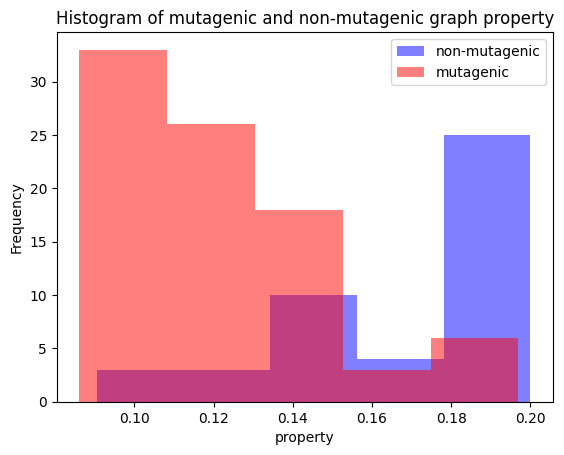

In [46]:
def graph_property(G:nx.Graph) -> float:
    feature = nx.density(G)
    return feature

G_train_property = np.array([graph_property(G) for G in G_train])

# Plotting the distribution of the property across mutagenic and non-mutagenic graphs
plt.hist(G_train_property[np.array(y_train)==-1], bins=5, color='blue', alpha=0.5, label='non-mutagenic')
plt.hist(G_train_property[np.array(y_train)==1], bins=5, color='red', alpha=0.5, label='mutagenic')

plt.legend(['non-mutagenic','mutagenic'])

plt.xlabel('property')
plt.ylabel('Frequency')
plt.title('Histogram of mutagenic and non-mutagenic graph property')

plt.show()

**Comment:** the clear rightward skew of density among mutagenic graphs and leftward skew of density among non-mutagenic graphs indicate that density is indeed indicative of mutagenicity, as the two classes' density distributions favor different values. That said, the distributions do overlap, meaning that while density promotes separability, it would need to be combined with other graph metrics to train a successful classifier.

---

**1.1.3 [3 pts]** **Suggest** 2 more graph features and compute them for all the graphs in the training set. **Motivate** the choice of features. You may use networkX implementation of the features computations if exist. **Train** a classifier using the `sklearn` library on the suggested features and the feature from the previous question (3 in total). Report the results for the test set. Don't forget to import the chosen classifier from the library.   

**Your answer here:**

We select cyclomatic complexity and diameter as our other two features. Our process and motivation is described below.

With little prior information about molecule graphs, our approach for selecting the other two features for our classifier involves searching for the graph-level features that are (1) linearly separable and (2) highly correlated with mutagenicity. We calculate several graph-level features below, including distance-based metrics (diameter, average shortest path length), centrality (betweenness centrality, closeness centrality), and metrics capturing substructures (# bridges, wiener index, cyclomatic complexity, and # triangles), and visualize them below. 

In [47]:
import pandas as pd

def get_graph_properties(G:nx.Graph) -> dict:
    nodes = len(G.nodes())
    edges = len(G.edges())
    diameter = nx.diameter(G)
    density = nx.density(G)
    bridges = len(list(nx.bridges(G)))
    mean_closeness_centrality = np.mean(list(nx.degree_centrality(G).values()))
    mean_spl = nx.average_shortest_path_length(G)
    conncected_components = len(list(nx.connected_components(G)))
    wiener_index = nx.wiener_index(G)
    triangles = len(list(nx.triangles(G)))
    
    return {
        'diameter': diameter,
        'density': density,
        'bridges': bridges,
        'closeness_centrality': mean_closeness_centrality,
        'avg_spl': mean_spl,
        'wiener_index': wiener_index,
        'cyclomatic_complexity': edges - nodes + conncected_components, # Expect connected components to be 1 for all graphs...
        'triangles': triangles
    }
    
X_train = [get_graph_properties(x) for x in G_train]

df = pd.DataFrame(X_train, pd.Series(y_train, name='class')).reset_index()

df.head()

,class,diameter,density,bridges,closeness_centrality,avg_spl,wiener_index,cyclomatic_complexity,triangles
0,-1,6,0.196970,3,0.196970,2.848485,188.0,2,12
1,-1,7,0.153846,8,0.153846,3.252747,296.0,1,14
2,-1,5,0.200000,5,0.200000,2.690909,148.0,1,11
3,1,10,0.106719,3,0.106719,4.130435,1045.0,5,23
4,1,11,0.096667,5,0.096667,4.306667,1292.0,5,25


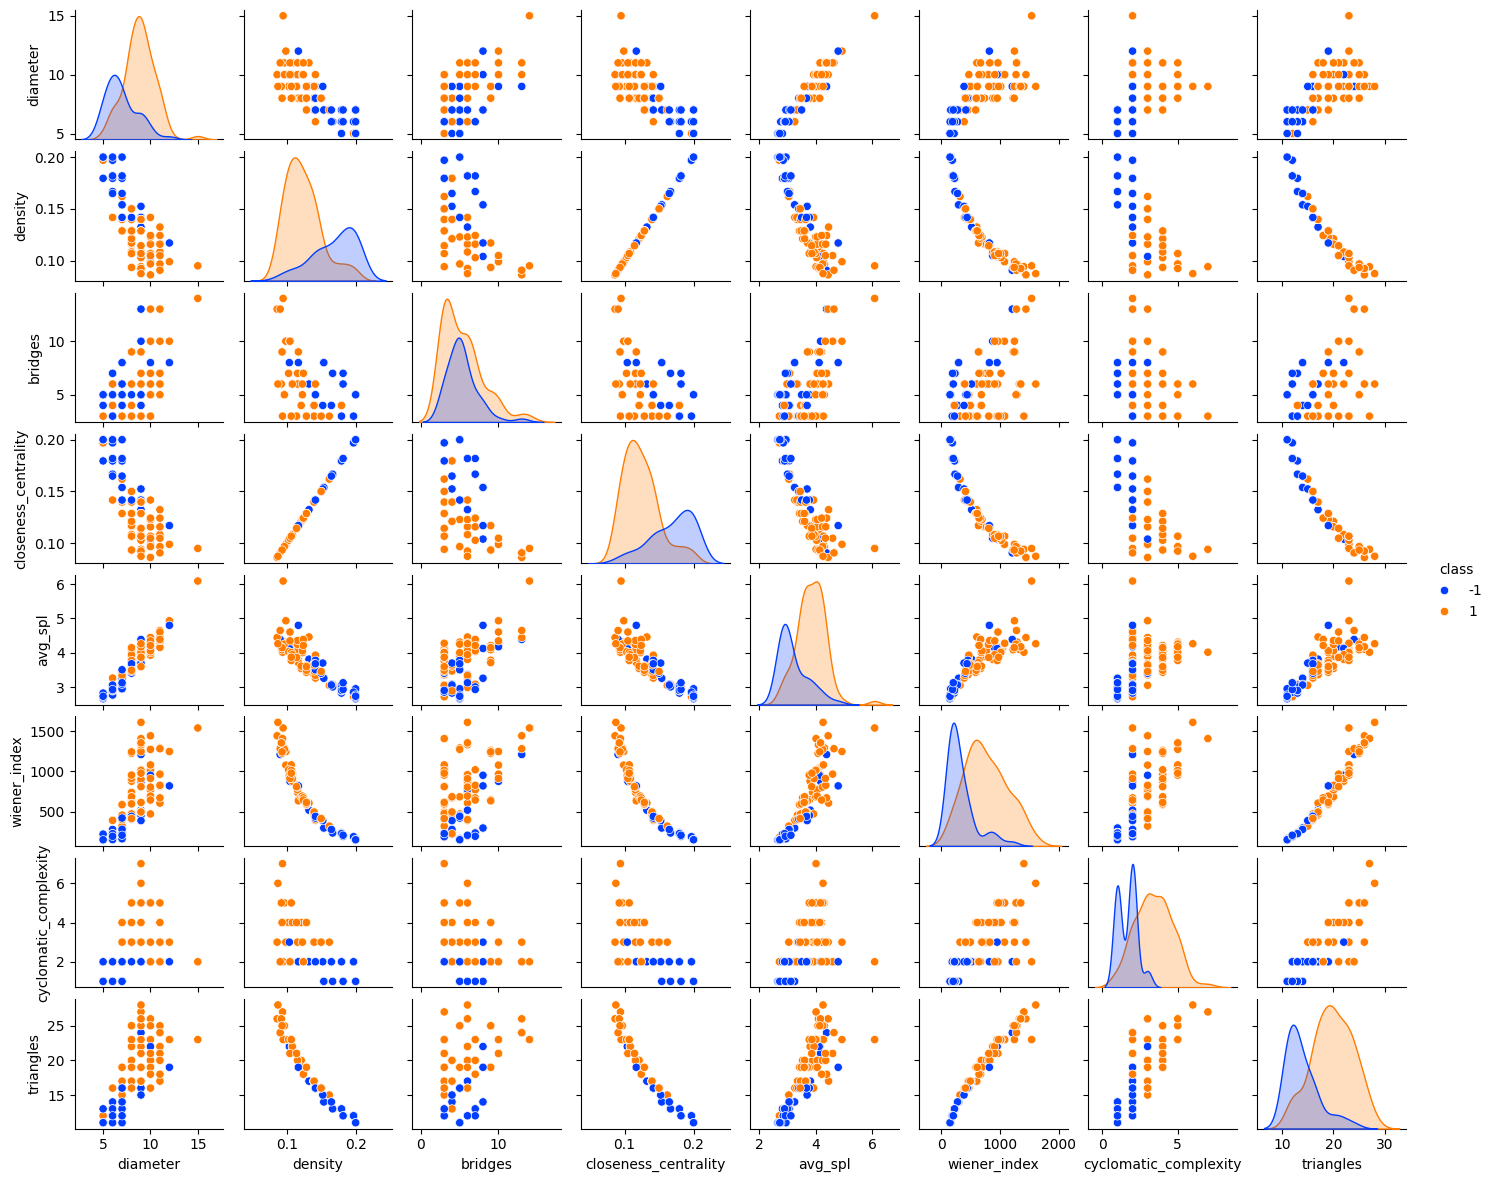

In [48]:
import seaborn as sns
# Pairplot the dataframe with hue as class
pairplot_fig = sns.pairplot(df, hue='class', palette='bright', height=1.5, aspect=1.2)
plt.show()

**Comments:** we observe that all features except the number of bridges promote some level of linear separability between mutagenicity classes. However, many of the KDE plots are similar in shape, suggesting these features might be highly correlated with one another. We turn to a correlation matrix next to see if we can uncover features correlated with class but less correlated with density (our preexisting feature) and each other.  

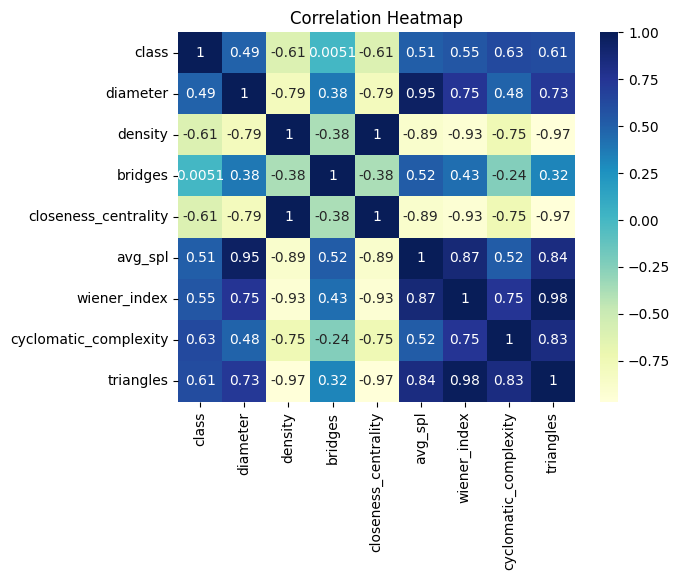

In [49]:
corrplot_fig = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

**Comments:** Many of our potential features have moderate to strong correlations both with class and one another. In an effort to avoid multicollinearity, and keeping in mind that most of our features are linearly separable, we settle on cyclomatic complexity and diameter as our second and third features. These two features exhibit a correlation with class, have relatively (but not absolutely) low correlations with density, and have relatively (but not absolutely) low correlations with one another. 

The diameter represents the longest shortest path of the graph. A large diameter might imply that there are peripheral nodes far from the central action, which could be indicative of hierarchical structures or long chains of connectivity within the network. When combined with density, we measure graph width (diameter) and saturation of connectedness (density). Cyclomatic complexity is a measure of the complexity of a network, based on the number of cycles it contains. A high cyclomatic complexity suggests multiple pathways and rings, indicating a complex network topology. Whereas density measures the proportional difference between nodes and edges, cyclomatic difference rather measures the difference in absolute terms.

With our three features in hand, we prepare a decision tree classifier and report the results below.

Classification accuracy with handcrafted graph features: 0.9474
Classification f1-score with handcrafted graph features: 0.9610
More detailed classification report:

              precision    recall  f1-score   support

          -1       0.89      0.94      0.92        18
           1       0.97      0.95      0.96        39

    accuracy                           0.95        57
   macro avg       0.93      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



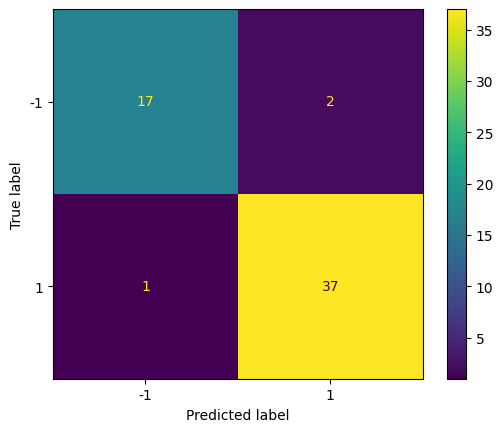

In [50]:
# Your solution here ###########################################################
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

def get_graph_properties(G:nx.Graph) -> dict:
    diameter = nx.diameter(G)
    density = nx.density(G)
    cyclomatic_complexity = len(G.edges()) - len(G.nodes()) + len(list(nx.connected_components(G)))
    
    return [diameter, density, cyclomatic_complexity]


F_train = [get_graph_properties(G) for G in G_train] #train features array
F_test = [get_graph_properties(G) for G in G_test] # test features array

# Initialize and train the classifier
classifier = DecisionTreeClassifier(criterion='entropy', 
                                    splitter='random',
                                    random_state=seed)
classifier.fit(F_train, y_train)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

y_pred = classifier.predict(F_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print(f"Classification accuracy with handcrafted graph features: {accuracy:.4f}")
print(f"Classification f1-score with handcrafted graph features: {f1_score:.4f}")
print("More detailed classification report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix (added by students)
cm = metrics.confusion_matrix(y_pred, y_test, labels=[-1,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

Our decision tree classifier achieves an accuracy of 0.9474 and F1 Score of 0.961. Only 3/57 graphs in the test set are misclassified!

---

### Question 1.2: Graph kernels (18 pts)

### Graphlet Kernels

**1.2.1 [1 pts]** Read the following passage. It's from a study that investigated the MUTAG molecules and properties related to mutagenicity.
Given the results of the handcrafted features graph representation from the previous question, **suggest** what type of information that is important for the task at hand is not captured. **Answer:** would a kernel based method help in that case? **Explain**.


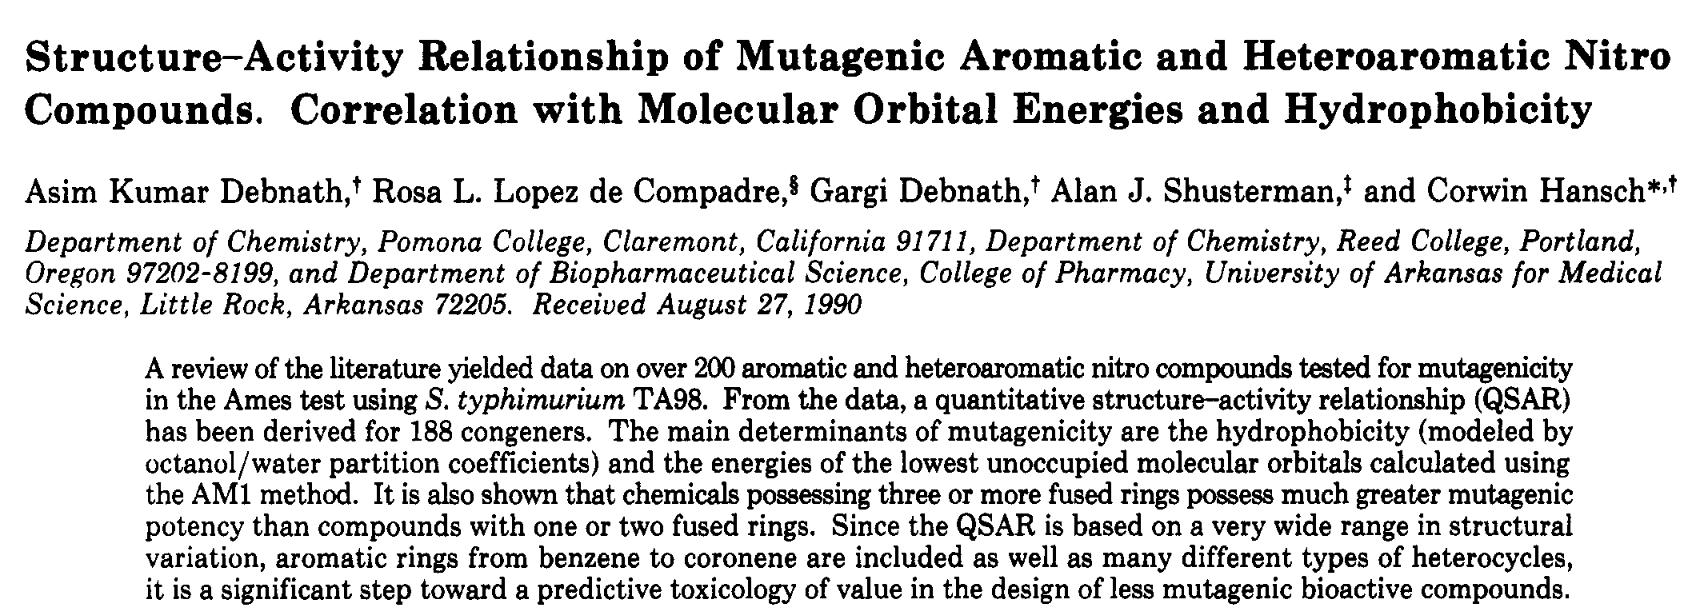

**Your answer here:**

Our graphs are currently just nodes and edges, and the hand-crafted features are constructed solely on the node-edge structure. They do not target any chemical information. According to the provided passage, the main determinants of mutagenicity (which are currently not captured) includes:

- **Hydrophobicity,** or the tendency of non-polar molecules to form aggregates in order to reduce their surface of contact with polar molecules such as water ([Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2851852/)). The study lists this as a main determinant of mutagenicity. It is modeled by ocatonal/water partition coefficients, which we do not measure. 
- **Unoccupied Molecular Orbitals.** The energies of the lowest unoccupied molecular orbitals (LUMO) are found to be a significant determinant by the study. However, because we do not consider electron presence at nodes in our features, we do not measure it.
- **Fused Rings:** it is specifically noted that compounds with three or more fused rings have greater mutagenic potency. While cyclomatic complexity could hint at this, it does not directly capture the concept of fused rings because of their relationship to atom counts which, again, we do not measure.

Our background knowledge of chemistry is rather limited. That said, if there exists a kernel trick that can capture similarities in the features above without actually having access to them in higher-dimension space, it can help. Of the features above, the count of fused rings appears to be the most measureable via a kernel trick given current information in the graph; this is because it is reduced to calculating the number of edge-sharing cycles if we assume each node is an atom, a quantity which, while computationally difficult to measure, is technically available simply from a series of nodes and edges.

---

**1.2.2 [2 pts]** Given the mutagenicity-relevant structures mentioned in the passage in q.1.1.2 is the relevant graphlet kernel computationally tractable? Explain by computing the complexity.*Hint: You can find some intuition in the following paper (section 3.1): https://proceedings.mlr.press/v5/shervashidze09a/shervashidze09a.pdf*

**Your answer here:**

The graphlet kernel counts the frequency of specific graphlets/subgraphs of a fixed size in the graph representation of the molecules. The most cumbersome portion of computing the graphlet kernel involves calculating possible graphlets, which runs in $O(n^k)$ time *for each graph*, where n is the number of nodes and k is the size of the graphlet. To see this, imagine we are measuring the presence of 3-node graphlets in an n-node graph. For a given node, we have to consider all n-1 other nodes as one neighbor in the graphlet and the n-2 remaining nodes as a second neighbor in the graphlet. Hence, we have computational complexity of $O(n*(n-1)*(n-2)) = O(n^3)$. Clearly, this becomes more and more computationally intractable the larger k becomes. In the context of mutagenicity and the passage provided, we might soon find ourselves in this intractable space when searching for the presence of more complex structures like fused rings (which should have a minimum size of 6 as seen in the case where two three-node cycles share an edge).

---

**1.2.3 [3 pts]** In the Servashidze et. al paper from the previous question they suggest to sample the graphlets (sections 3.1-3.2).

**Answer**

* What is the intuition behind the sampling?
* What would be a proper sample size for $k=3$ sized graphlets? **Estimate and explain**  



**Your answer here:**
Because of the computational complexity of enumerating all possible graphlets is $O(n^k)$, Shervashidze et al. suggest sampling potential graphlets of size k in a manner that bounds deviation between the estimated and actual distribution of observed graphlets. Essentially, it's a way to estimate the distribution of graphlets in a way that allows one to quantify the approximation's precision. By drawing a sufficient number of random samples, the authors posit we can get 'close' to the true distribution while significantly reducing computational cost. 

In the paper, rather than compute a bound based directly on the $2^\binom{k}{2}$ total possible graphlets for a given k, they note that one can compute a bound based on a = the set of possible graphlets after deduplicating based on isomorphism (two graphlets are isomorphic if they share the same number of nodes and edge structure but have different node labels). Thus, for $k=4$, while there are technically $2^\binom{4}{2} = 64$ graphlets, sans isomorphism there exist only $a=11$ unique graphlets. For $k=3$, this way of counting gives us $a=4$ unique graphlets (three nodes fully connected, one edge removed, two edges removed, and all edges removed). 

The sample complexity bound presented in the paper is as follows:

$n = \lceil \frac{2(log(2))\cdot a - log(\delta)}{\epsilon ^2} \rceil$ 

Before calculating the bound for $k=3$ below, we briefly discuss the bound. From Theorem 6 in the paper, we observe that the number of required samples $m$ depends logarithmically on the graphlet set size $a$ and inversely quadratically on accuracy metric $\epsilon$ to keep the estimate within L1 distance $\delta$ of the true distribution. Ensuring isomorphism doesn't exist in our graphlet set drastically pays dividends through the $a$ factor that help keep $m$ low.



In [51]:
import math

def sample_size(k: int, N: int, a: int, gamma=0.1, eps=0.1) -> float:
  '''
  k: graphlet size (#nodes)
  N: graph size (#nodes)
  a: number of unique (disconnected & connected) graphlets
  '''
  # Your solution here #########################################################
  n_samples = math.ceil(2 * (math.log(2) * a - math.log(gamma) ) / (eps ** 2) )
  # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return n_samples

In [52]:
from math import comb
k = 3
# Your solution here #########################################################
N = -1000 # irrelevant to the bound!
a = 4
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
sampling = sample_size(k, N, a)
print(sampling)

1016


**1.2.4 [3 pts]** Define $k=3,5$ graphlet kernel using the `grakel` library (already imported). For $k=5$ use the smallest number of samples from the paper as appears in Table2.   

**Train** a classifier with the calculated kernel. Make sure you import the classifier from `sklearn`.

#### Code for $k=3$:

Number of samples: 1016
Classification accuracy with Graphlet Sampling kernel: 0.7895
Reported accuracy (Table 2) in paper: 0.7970 +/- 0.0043


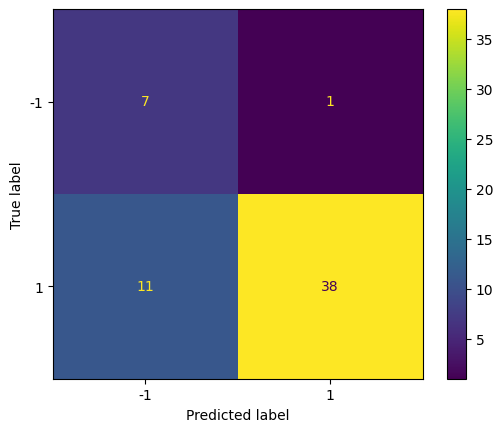

In [53]:
from grakel import GraphKernel, graph_from_networkx
from sklearn.svm import SVC

# Initialize the Graphlet Sampling kernel
# Note: You can adjust 'k' (size of graphlets) and 'sampling' (number of samples) as needed

k = 3
a = 4
N = -1000 # once again, N doesn't matter here

# Your solution here ###########################################################

n_samples = sample_size(k, N, a)
print('Number of samples:', n_samples)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

graphlet_kernel = GraphKernel(kernel={"name": "graphlet_sampling", "k": k, "sampling": {"n_samples": n_samples}}, normalize=True, random_state=seed)

# Convert networkX graphs to grakel
G_train_gk = graph_from_networkx(G_train)
G_test_gk = graph_from_networkx(G_test)


# Your solution here ###########################################################

K_train = graphlet_kernel.fit_transform(G_train_gk)
K_test = graphlet_kernel.transform(G_test_gk)

# Train a classifier on the training set
clf = SVC(kernel='precomputed', random_state=seed)
clf.fit(K_train, y_train)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with Graphlet Sampling kernel: {accuracy:.4f}")
print(f'Reported accuracy (Table 2) in paper: 0.7970 +/- 0.0043')

# Confusion matrix (added by students)
cm = metrics.confusion_matrix(y_pred, y_test, labels=[-1,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()


**Comments:** We observe decent classification accuracy similar to the paper's reported accuracy for the same configuration. However, we clearly see a strong preference towards the majority class (=1), leading the SVM Classifier to predict class 1 in almost 86% of the test cases...

#### Code for $k=5$:

Number of samples: 5174


Classification accuracy with Graphlet Sampling kernel: 0.8246
Reported accuracy (Table 2) in paper: 0.8162 +/- 0.0069


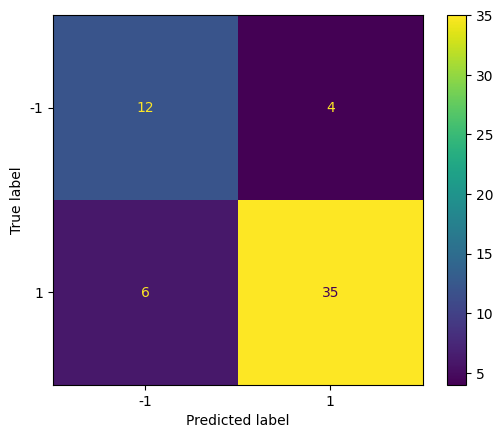

In [55]:
k = 5
a = 34 # selected based on the a that produces n_samples = 5174 per table 2 in the paper
N = -1000 # once again, N doesn't matter here

# Your solution here ###########################################################

n_samples = sample_size(k, N, a)
print('Number of samples:', n_samples)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

graphlet_kernel = GraphKernel(kernel={"name": "graphlet_sampling", "k": k, "sampling": {"n_samples": n_samples}}, normalize=True, random_state=seed)

# Convert networkX graphs to grakel
G_train_gk = graph_from_networkx(G_train)
G_test_gk = graph_from_networkx(G_test)


# Your solution here ###########################################################

K_train = graphlet_kernel.fit_transform(G_train_gk)
K_test = graphlet_kernel.transform(G_test_gk)

# Train a classifier on the training set
clf = SVC(kernel='precomputed', random_state=seed)
clf.fit(K_train, y_train)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with Graphlet Sampling kernel: {accuracy:.4f}")
print(f'Reported accuracy (Table 2) in paper: 0.8162 +/- 0.0069')

# Confusion matrix (added by students)
cm = metrics.confusion_matrix(y_pred, y_test, labels=[-1,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

**Comments:** For k=5, we observe improvements over k=3. The model is now able to predict class -1 correctly more often. The inherit tendency to prioritize class 1 might be related to the class imbalance of the MUTAG dataset. One way to address this imbalance might be through upweighting.

---

**1.2.5 [1 pts]** Which graphlet kernel performed better? **Suggest an explanation**

**Your answer here:**
When using the same values for $\epsilon$ and $\delta$, the graphlet kernel performed better with $k=5$. This makes sense: the higher the k, the more unique graphlet configurations can be captured, pushing the feature space to a higher dimension. Increased dimensionality offers our SVM more discriminative power and perhaps uncovers complex graphlets particularly indicative of mutagenicity that are not present in the size-3 set. The size-3 set, meanwhile, contains graphlets that are likely to appear more frequently in both mutagenic and non-mutagenic, offering less assistance for classification.  

The graphlet kernel with $k=5$ generally yielded higher accuracy and higher computational load in the reference paper's table comparing GK-accuracies on MUTAG for different sample counts. This mirrored our experience, where the $k=3$ kernel calculation and classification ran in seconds and the cell with a $k=5$ kernel took 1-2 minutes. Accuracy, meanwhile, was only slightly higher.

---

### Other Kernels

**1.2.6 [2 pts]** One of the downsides of the aforementioned implementation of graphlet kernels is that it doesn't take into account node labels. In the MUTAG dataset we have access to those labels. **Suggest** another kernel that can take into account the node labels and is also computationaly efficient. **Motivate** your choice.

**Your answer here:**

We select the Weiseiler-Lehman (WL) kernel. This kernel can be run in $O(G^2nh)$ time, where G = number of graphs, n = number of nodes, and h = number of iterations ([source](https://ethz.ch/content/dam/ethz/special-interest/bsse/borgwardt-lab/documents/slides/CA10_WeisfeilerLehman.pdf)), which is more computationally efficient than the graphlet kernel's $O(Gn^k)$ asymptotic efficiency as soon as k begins incrementing. The WL kernel also explicitly takes node labels into account. It iteratively aggregates the labels of each node's neighbors, sorts these labels, compresses them via a hashing mechanism, and relabels each node, ultimately yielding an embedding that bakes in label information. This process efficiently captures both local structure and label information in the graph, leading to improved expressiveness over the graphlet kernel, which only captures substructure incidence. 

In [56]:
# Let's add nodes labels to the G_train and G_test graphs
with open('MUTAG/MUTAG_node_labels.txt', 'r') as f_nodes:
      node_labels = [int(line.strip()) for line in f_nodes]

for G in G_train:
  for n in G.nodes:
    G.nodes[n]['label'] = node_labels[n-1]

for G in G_test:
  for n in G.nodes:
    G.nodes[n]['label'] = node_labels[n-1]

**1.2.7 [2 pts]**  **Define** the kernel in the code block below and **train** a classifier using it.

Classification accuracy with chosen kernel: 0.8246


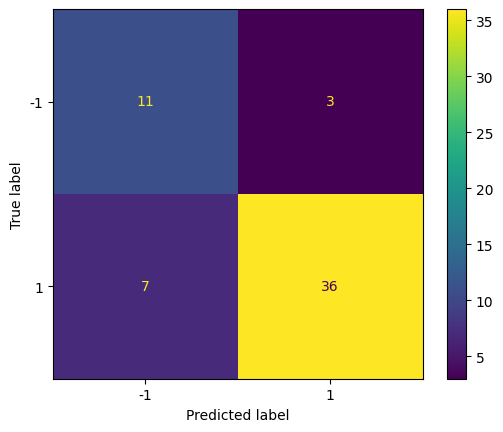

In [57]:
# Your solution here ###########################################################

# Initialize the kernel
kernel = GraphKernel(kernel={"name": "weisfeiler_lehman", "n_iter": 5,},
                                       normalize=True,
                                       random_state=seed)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_train_gk = graph_from_networkx(G_train, node_labels_tag='label')
G_test_gk = graph_from_networkx(G_test, node_labels_tag='label')


# Your solution here ###########################################################

# Compute the kernel matrix
K_train = kernel.fit_transform(G_train_gk)
K_test = kernel.transform(G_test_gk)

# Train a classifier on the training set
clf = SVC(kernel='precomputed', random_state=seed)
clf.fit(K_train, y_train)


# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with chosen kernel: {accuracy:.4f}")

# Confusion matrix (added by students)
cm = metrics.confusion_matrix(y_pred, y_test, labels=[-1,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

**1.2.8 [3 pts]** Let's investigate the performance of the kernel without the node labels, i.e, its ability to capture structural similarity solely. In order to do that we first assign arbitrary labels (=1) to the nodes.

In the code block **define** again the kernel from the previous question and **train** a classifier.

In the text box **answer**: does the suggested kernel outperform the graphlet kernel? If it does, try to explain. If it doesn't, explain and try to suggest an improvement. You may search in the literature.

In [58]:
# Let's add arbitrary nodes labels to factor out nodes information
with open('MUTAG/MUTAG_node_labels.txt', 'r') as f_nodes:
      node_labels = [int(line.strip()) for line in f_nodes]

for G in G_train:
  for n in G.nodes:
    G.nodes[n]['label'] = 1

for G in G_test:
  for n in G.nodes:
    G.nodes[n]['label'] = 1

Classification accuracy with chosen kernel: 0.7368


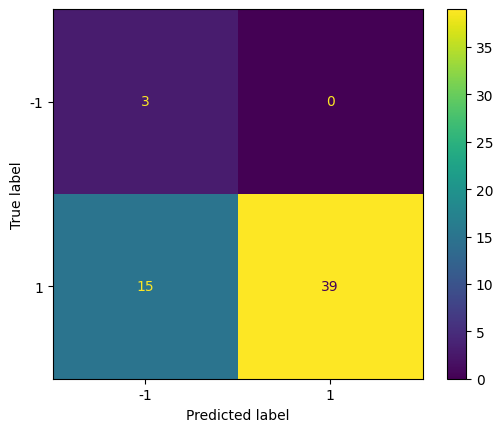

In [59]:
# Your solution here ###########################################################

# Initialize the kernel
kernel = GraphKernel(kernel={"name": "weisfeiler_lehman", "n_iter": 5,},
                                       normalize=True,
                                       random_state=seed)


# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_train_gk = graph_from_networkx(G_train, node_labels_tag='label')
G_test_gk = graph_from_networkx(G_test, node_labels_tag='label')


# Your solution here ###########################################################

# Compute the kernel matrix
K_train = kernel.fit_transform(G_train_gk)
K_test = kernel.transform(G_test_gk)

# Train a classifier on the training set
clf = SVC(kernel='precomputed', random_state=seed)
clf.fit(K_train, y_train)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with chosen kernel: {accuracy:.4f}")

# Confusion matrix (added by students)
cm = metrics.confusion_matrix(y_pred, y_test, labels=[-1,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

**Noteable observation:** the confusion matrix illustrates that the WL kernel with uniform labels shows tendencies to prioritize the majority class. This is demonstrated by 54 vs. 3 predictions for respectively majority and minority class (predicts class 1 in approximately 95% of the test cases...!)

**Your answer here:**

The WL kernel does not outperform the graphlet sampling kernel on purely structural terms.

Our graphlet sampling Kernel with k=3 and 1016 samples achieved a classification accuracy of 0.7895, while the version with k=5 and 5174 samples had an accuracy of 0.8246. On the other hand, the WL kernel with 5 iterations and uniform labels obtained an accuracy of just 0.7368. Based on these results, the graphlet sampling kernel appears to best describe graph structures and differentiate classes based solely on these structural properties.

The WL kernel iteratively aggregates neighborhood information to capture both local and global topological properties of the graph, while the graphlet sampling kernel instead decomposes the overall graph structure into specific subgraph components. Assuming that chemical properties indicative of mutagenicity are related to local structural properties (which is our impression after the mentioning of properties like hydrophobicity, unoccupied molecular orbitals, and fused rings in the provided passage), the graphlet kernel should be better suited to capture these local structures (especially if the specific graphlet configurations captures the structure of specific chemical properties).

As for improvements, perhaps hypertuning the # of steps taken in the WL kernel could improve its structure-only performance. If our intuition in the second paragraph is correct, it is possible lowering the # of steps taken during WL could assign more weight to local structural properties in the graph embeddings relative to global structural properties, thus better targeting the chemical properties in the passage and improving classification performance. 

---

**1.2.9 [1 pts]** Given the performance of the handcrafted features and the kernels in the MUTAG classification task, **suggest** another kernel that you expect to perform well and **explain** your choice. *Hint: you may go over the list of implemented kernels in the `grakel` library to get some intuition.*


**Your answer here:**

We propose the neighborhood hash kernel.

The neighborhood hash kernel compares graphs by considering their vertices' local neighborhoods and how these are globally integrated within the entire graph. More specifically, it calculates all shortest paths in a graph before comparing equal-length inter-graph shortest paths to (in this instance) measure how often different graphs experience the same pattern of mutagenicity along a shortest path. The resultant features used for classification are vectors of similarity scores that represent a graph.

We like this kernel because it (1) is computationally efficient relative to the graphlet kernel (neighborhood hash is $O(G^2*n^2(m+log(n)+1+\delta^2))$ with G = number of graphs, n = number of nodes in a graph comparison, m = number of edges in a graph comparison, and $\delta$ is the diameter of the combined shortest path set in the two graphs), (2) incorporates mutagenicity label information, (3) incorporates both local and global structural information, and (4) uses shortest paths, a concept related to diameter, one of the hand-crafted features in our initial and rather successful classifier, to create graph representations. Points 2-4 should all make it particularly suited for classifying chemical compound graphs where arrangement and connectivity of atoms (local structures) determine compound properties (global behavior).

It is also fun to see that GraKel's implementation of the neighborhood hash kernel is dubbed ['GraphHopper'](https://ysig.github.io/GraKeL/0.1a7/kernels/graph_hopper.html).

---

# **Part 2: K-hop Selection [6 pts]**

# Objective:

In this part you will get an intuition about the usefulness of the power of the adjacency matrix and their relation to the receptive field of a graph. This is important for future work on graph representation learning if we deal with large graphs or graphs with distant dependencies among nodes, in which more than one-hop neighborhood needs to be considered.

**2.1 [3 pts]** Given a graph G consisting of *n* nodes, write a function that takes as input G, an integer k, and a randomly selected node *i*, and returns the nodes positioned at the k-th hop neighborhood of node *i*. You need to use the powers of the adjacency matrix as part of the solution.

In [60]:
import networkx as nx
import numpy as np

Nodes at 2-th hop neighborhood of node 10: [ 1  2  3  4  7  8  9 10 11 13 14 15 16]


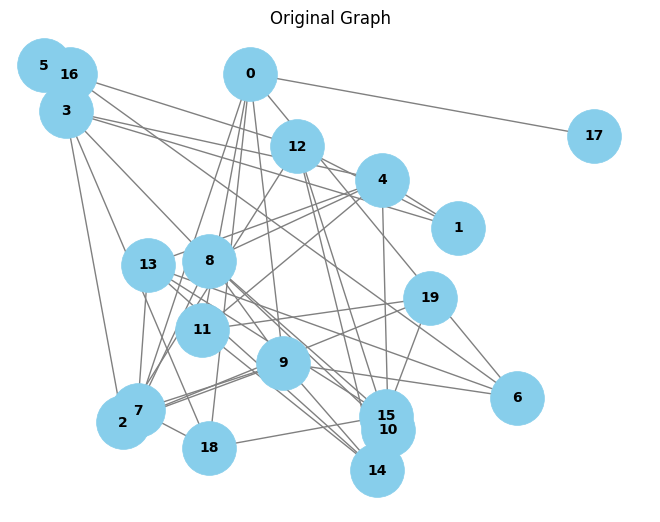

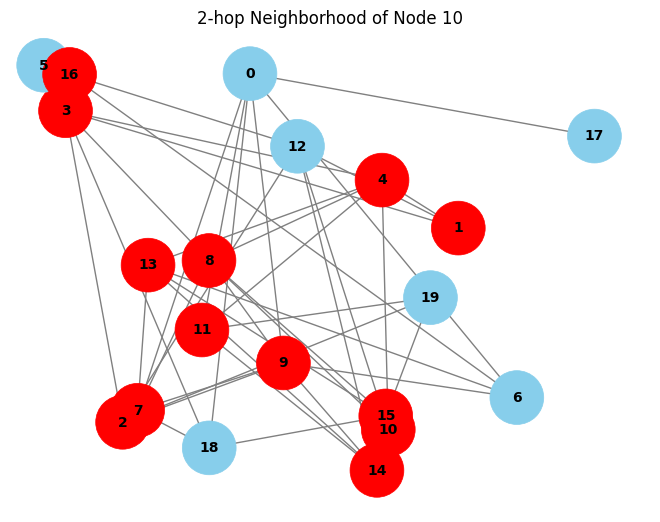

In [61]:
def k_hop_neighborhood(adj_matrix, node_index, k):
    # Your solution here ###########################################################
    adj_power = np.linalg.matrix_power(adj_matrix, k)
    
    # Find all nodes reachable in exactly k hops
    # These nodes will have a non-zero entry in the adj_power matrix at the given node_index
    neighbors_at_k_hop = np.where(adj_power[node_index] > 0)[0]

    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    return neighbors_at_k_hop,adj_power

# Generate a random graph using NetworkX
G = nx.fast_gnp_random_graph(20, 0.2, seed=seed)

# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Choose the node index and hop distance

"""
Example- Test with different values of node index and k below.
"""
node_index = 10
k = 2

# Find nodes at the k-th hop neighborhood
neighborhood,power = k_hop_neighborhood(adj_matrix, node_index, k)
print(f"Nodes at {k}-th hop neighborhood of node {node_index}: {neighborhood}")

# Visualize the graph
pos = nx.random_layout(G, seed=seed)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', linewidths=0.5, edge_color='gray')
plt.title('Original Graph')
plt.show()

# Highlight the nodes at k-hop neighborhood
nodes_to_highlight = [node_index] + list(neighborhood)
node_colors = ['red' if node in nodes_to_highlight else 'skyblue' for node in range(len(adj_matrix))]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, font_size=10, font_weight='bold', linewidths=0.5, edge_color='gray')
plt.title(f'{k}-hop Neighborhood of Node {node_index}')
plt.show()

**2.2 [3 pts]** Given the graph G above, define random node features of any size d (e.g d=32) for each node of the graph. Now extend the function above to select nodes from random hops relative to each node i, and sum the node embeddings to update node i's features. (i.e if the graph has 20 nodes, define 20 random vectors of size d=32. Then given a node A at position i, select nodes from 2 random hops, say 1 and 3. Now sum the random features of these nodes, and sum them again with node A's initial features)

In [62]:
def k_hop_neighborhood_sampling(adj_matrix, node_index, k_hops, features):
    # Your solution here ###########################################################
    
    # Initialize the new features for the node as its original features
    new_node_features = np.copy(features[node_index])
    
    # Iterate over the list of hop distances
    # Per discussion on moodle forum, we allow nodes features to be added to our
    # chosen node's feature vector as many times as they appear in the set of k-hops
    for k in k_hops:
        # Calculate the k-th power of the adjacency matrix to find k-hop neighbors
        adj_power = np.linalg.matrix_power(adj_matrix, k)

        # Find all nodes reachable in exactly k hops (including self-loops)
        neighbors_at_k_hop = np.where(adj_power[node_index, :] > 0)[0]
        
        # Sum the features of these neighbors
        # per discussion on moodle forum, we add each visited node's feature vector
        # to that of our chosen node's feature vector rather than avg pooling all visited
        # nodes' feature vectors before summation. 
        for neighbor_index in neighbors_at_k_hop:
            new_node_features += features[neighbor_index]
            
    
    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    return new_node_features



# Generate a random graph using NetworkX

G = nx.fast_gnp_random_graph(20, 0.2)

# Your solution here ###########################################################

np.random.seed(seed)
d = 32
features = np.random.rand(G.number_of_nodes(), d)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Choose the node index and hop distance
node_index = 5
k_hops = [1, 2]

# Update the features of the node based on the k-hop neighborhood sampling
new_features = k_hop_neighborhood_sampling(adj_matrix, node_index, k_hops, features)
print(f"Original features for node {node_index}:\n{features[node_index]}\n")
print(f"Updated features for node {node_index}:\n{new_features}")

Original features for node 5:
[0.36778313 0.63230583 0.63352971 0.53577468 0.09028977 0.8353025
 0.32078006 0.18651851 0.04077514 0.59089294 0.67756436 0.01658783
 0.51209306 0.22649578 0.64517279 0.17436643 0.69093774 0.38673535
 0.93672999 0.13752094 0.34106635 0.11347352 0.92469362 0.87733935
 0.25794163 0.65998405 0.8172222  0.55520081 0.52965058 0.24185229
 0.09310277 0.89721576]

Updated features for node 5:
[ 7.39206723  8.22194063  7.17624371  6.92085661  6.46694575 11.08280359
  7.59007257  6.65251812  6.00640451  9.15933947  7.29354653  9.23528767
  7.76304734  3.69210904  8.06347423  6.22867938  8.72047012  7.13256783
  8.04576453  6.51673819  5.71805186  8.06708331  7.73230295  8.77153561
  8.57298308  7.62422826  8.15570321  7.43519315  9.14442758  7.55703476
  7.8610875   9.78476123]


We now visualize the evolution of embeddings as we increment the number of hops used in our k_top_neighborhood_sampling() function.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_k_hop_sampling_embedding(G, adj_matrix, k_hops, features):
    
    def standardize_features(features):
        mean = np.mean(features, axis=0)
        std = np.std(features, axis=0)
        standardized_features = (features - mean) / std
        return standardized_features
        
    cmap = 'inferno'

    standardized_features = standardize_features(features)
    fig, axs = plt.subplots((len(k_hops)+1) // 2, 2, figsize=(16, 10), sharex=True ,sharey=True)
    sns.heatmap(standardized_features, ax=axs[0,0], cmap=cmap)
    axs[0,0].set_title('Original Features')
    axs[0,0].set_xlabel('Feature')
    axs[0,0].set_ylabel('Node')
    
    for i in range(1, len(k_hops)+1):
        random_hop_features = []
        tmp_k_hops = k_hops[:i]
        
        for idx in range(G.number_of_nodes()):
            random_hop_features.append(k_hop_neighborhood_sampling(adj_matrix, idx, tmp_k_hops, features))

        random_hop_features = np.array(random_hop_features)
        standardized_updated_features = standardize_features(random_hop_features)

        sns.heatmap(standardized_updated_features, ax=axs[i//2,i%2], cmap=cmap)
        axs[i//2, i%2].set_title(f'K-Hop Sampling features for K_Hops = {tmp_k_hops}')
        axs[i//2, i%2].set_xlabel('Feature')
        axs[i//2, i%2].set_ylabel('Node')

    plt.tight_layout()
    plt.show()

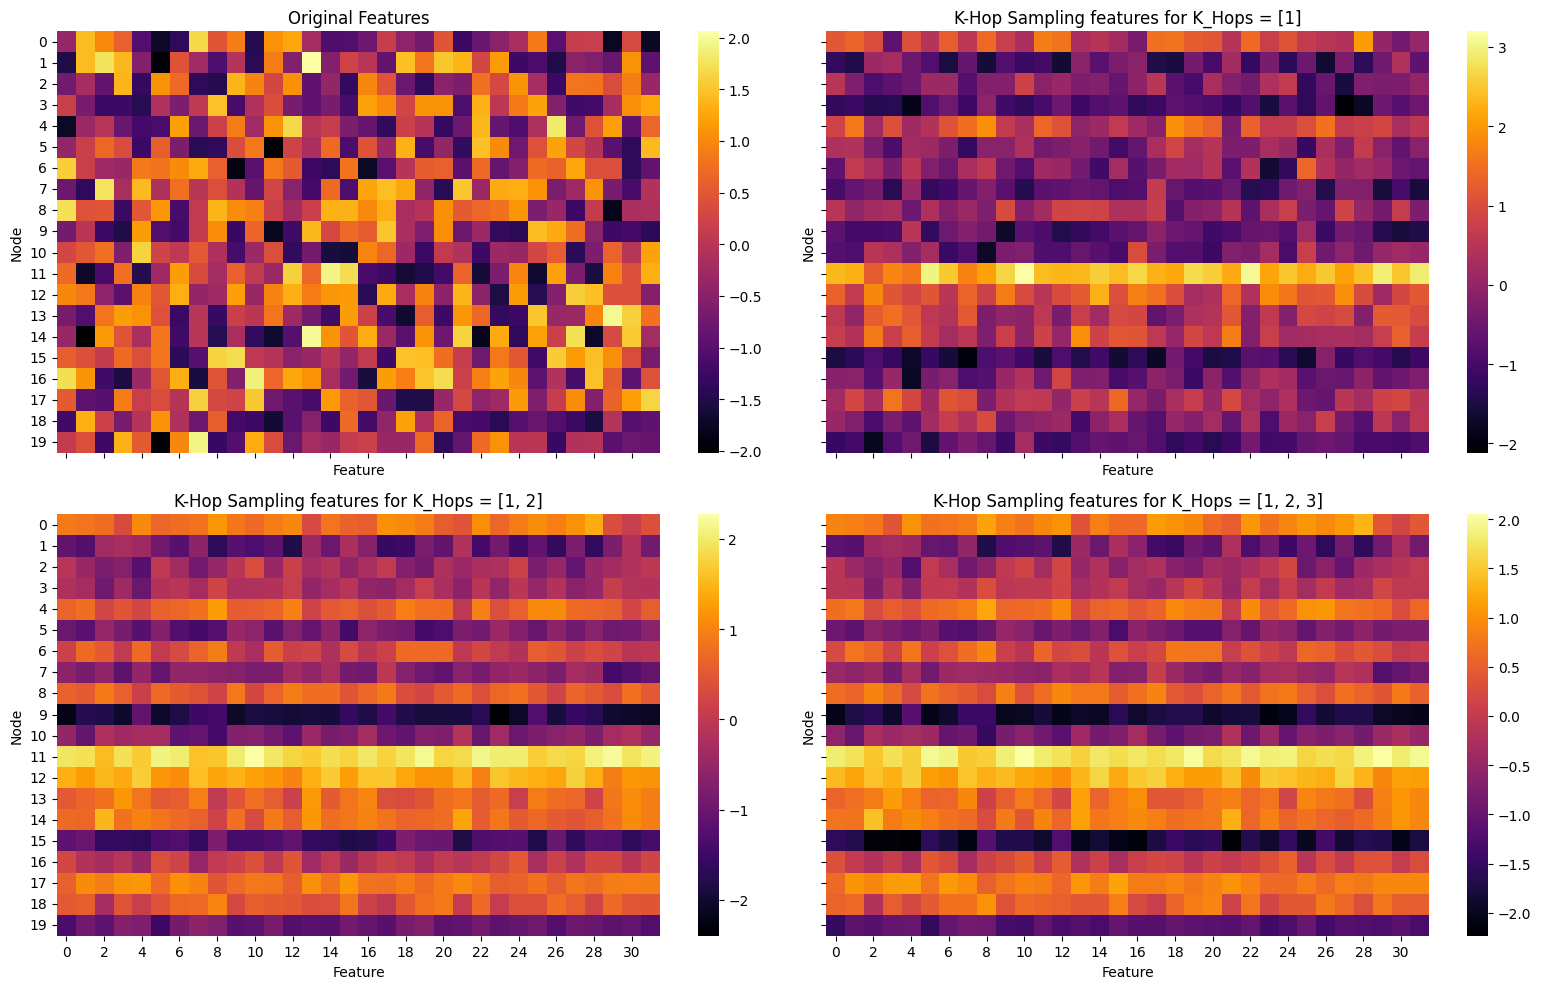

In [64]:
k_hops = [1,2,3]

plot_k_hop_sampling_embedding(G, adj_matrix, k_hops, features)

**Comment:** we observe that the initial features (top left) resemble gaussian noise while the standardized k-hop samples iteratively heighten inter-embedding variance with additional hops (sequence is top right, bottom left, bottom right; see titles). This is because each successive hop widens and compounds neighborhood information for summation into a given node's embeddings; nodes central to dense edge networks wind up with high magnitude embeddings (bright orange in the graphs above). Note that standardization is applied columnwise to make each embedding iteration comparable.

# **Part 3: Node Classification [28 pts]**

## Objective

The purpose of this assignment is to explore the usefulness of hand-crafted features and learned features with node2vec in a supervised learning setting applied to the tasks of **node-labelling**.

The dataset we will use for this assignment is the Polblogs dataset. The Political Blogs dataset from the “The Political Blogosphere and the 2004 US Election: Divided they Blog” paper. Polblogs is a graph with 1,490 vertices (representing political blogs) and 19,025 edges (links between blogs). The links are automatically extracted from a crawl of the front page of the blog. Each vertex receives a label indicating the political leaning of the blog: liberal or conservative.

In [2]:
# Download the package we will use
from IPython.display import clear_output
clear_output()

In [66]:
# Download the node2vec package we will use
# Run this cell to kill the current runtime after downloading 'node2vec', so a package version conflict about 'gensim' when using 'node2vec' can be avoided
# Run all again after commenting out this cell completely
run_cell = False
if run_cell:
  import os
  from IPython.display import clear_output
  !pip install node2vec
  clear_output()
  os.kill(os.getpid(), 9)


In [4]:
#!pip install node2vec

In [3]:
# import useful libraries

from node2vec import Node2Vec
import numpy as np
import networkx as nx
%matplotlib inline
%env PYTHONHASHSEED=0
from IPython.display import clear_output
clear_output()

First of all, we can download the dataset and retrieve the characteristics of the network in the following cells.

In [4]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.1.0


In [5]:
from torch_geometric.datasets import PolBlogs
dataset = PolBlogs(root='./')

In [6]:
num_feats=dataset.num_node_features
num_classes=dataset.num_classes

In [7]:
dataset[0]

Data(edge_index=[2, 19025], y=[1490], num_nodes=1490)

In [8]:
# Convert PyTorch Geometric graph to NetworkX graph
from torch_geometric.utils.convert import to_networkx
G = to_networkx(dataset[0],node_attrs='y')

In [9]:
# Print the number of nodes and edges within the dataset
number_of_nodes = G.number_of_nodes()
print('Number of nodes (political blogs): {}' .format(number_of_nodes))
number_of_edges = G.number_of_edges()
print('Number of edges (inter-blog links): {}' .format(number_of_edges))

# Retrieve the labels of nodes in the dataset
values = nx.get_node_attributes(G, "y")
labels = np.unique([values[node] for node in G.nodes()])
print('The node labels are: {}' .format(labels))

Number of nodes (political blogs): 1490
Number of edges (inter-blog links): 19025
The node labels are: [0 1]


In [10]:
# Load the nodes with each label into a set of node lists
node_list = {}
node_list = [[n for n, v in values.items() if v == l] for l in labels]

# Load the edges between nodes with same/different labels into lists
edge_list_same = [[(s, d) for (s, d) in G.edges() if s in node_list[l] and d in node_list[l]] for l in labels]
edge_list_same_all = []
for l in labels:
  edge_list_same_all += edge_list_same[l]
edge_list_diff = [(s, d) for (s, d) in G.edges() if (s, d) not in edge_list_same_all]

# Show the nodes within each class
print('The labels of each node are:')
for l in labels: 
  print(node_list[l])

The labels of each node are:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 

Now let's visualize dataset, i.e., the graph connectivity of the nodes, and the node labels.

In [11]:
import matplotlib.pyplot as plt

/Users/hanskristianbjorgokvaerum/opt/anaconda3/envs/ada/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


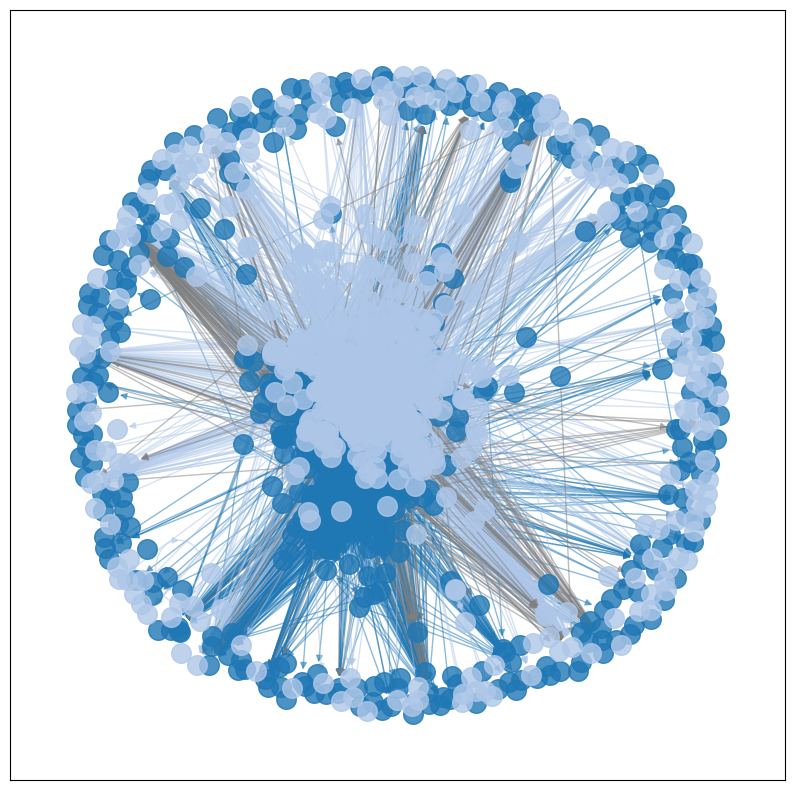

In [76]:
# Visualize the graph structure; nodes and edges within different classes (labels) are in different colors
cm = plt.cm.tab20
pos = nx.spring_layout(G, seed=0)
plt.figure(figsize=(10,10))

for l in labels:
  nx.draw_networkx_nodes(G, pos, nodelist= node_list[l], node_color=cm(l), node_size=200, alpha=0.8);
  nx.draw_networkx_edges(G, pos, edgelist = edge_list_same[l], width=1.0, alpha=0.5, edge_color=cm(l));
nx.draw_networkx_edges(G, pos, edgelist = edge_list_diff, width=1.0, alpha=0.5, edge_color="tab:gray"); # add semicolons to suppress useless output after each edge draw...

In this section, you will perform a node-labelling or classification task. You will do this in two different settings:

(a) Using traditional features of degree, eigenvector centrality,
  betweenness centrality,
  closeness centrality, and the
  clustering_coefficients, to train a an SVM classifier

(b)  Using node2vec features to train a an SVM classifier

You can use the sklearn library for this task.


### **3.1 On choice of node features [4 pts]**

(a) Can you think of 5 hand-crafted node features (discussed in the theory lectures) that would be the most helpful to the task of node prediction for this dataset? Please motivate your choice in few sentences.

(b) Between the hand-crafted features and node2vec features, which do you think would be better predictors? Please motivate your answer.



**Your answer here:**

*(a) Handcrafted features:*

For the Polblogs dataset, which concerns the political leaning of blogs, we have chosen to consider in-degree, eigenvector centrality, betweenness centrality, closeness centrality, and clustering coefficient as our five hand-crafted features for this classification task. This decision is based on discussed theory in the lectures, as well as a belief that they can complement each other on a node-level classification task. This can be examplified with the centrality metrics: eigenvector centrality considers the qulity of connections, betweenness centrality measures node-tendency to appear on shortest paths between vertices and closeness centrality measures average "closeness" to all other nodes. By including metrics as in-degree, we also measure a blog's "relevancy" by considering how frequently it is linked to from other blogs, as well as clustering coefficient, which captures the degree to which nodes in a graph cluster together, e.g. in communities of blogs with similar political leaning. 

From the above graph plot, we observe that both classes (representing political leaning of the blog) exhibit similar graph structure, with a cluster of 'central' blogs party to a plethora of inter-blog links to less connected blogs. Additionally, scanning the connections emanating from the graph's outer ring, one develops the sense that the class shaded light blue appears to have a higher incidence of these possible clusters (as indicated by degree and edge dispersion) than the class shaded dark blue. If centrality characteristics do indeed differ on average between the two ideologies, our SVM classifier should be able to utilize them to differentiate classes. 

We can readily imagine how this might occur: if, say, liberal-labeled blogs are organized into a more hierarchical online community than conservative blogs, meaning a blog is only as important as the blogs that listen/respond/link to it, then liberal-ideology blogs may be more likely to exhibit higher eigenvector centrality relative to conservative-ideology blogs - and also lower in-degree, since there would be a great many blogs paid little attention by other blogs due to their low status in the hierarchy. In contrast, if conservative-labeled blogs are all sourcing opinions or response pieces from a smaller selection of major blogs and rarely any others, then conservative-ideology blogs may have higher closeness centrality on average (all nodes can be linked through the high-traffic set). Conversely, this would yield a lower betweenness centrality on average, since few nodes are earning the attention that would place them onto a shortest path. These intuitions can also be retooled to consider cross-ideology blog linkages; if, for example, high-impact conservative blogs link to high-impact liberal blogs but never the other way around, then liberal blogs may have higher eigenvector centrality on average.

As for clustering coefficient, this is yet another way to try and capture and exploit differences in structure between liberal and conservative blogs. Imagine that the online liberal community is home to a larger set of subideologies than conservative blogs, and that these subideologies are very close-knit: they are frequently linking to one another and infrequently linking to other subcommunities. In that case, liberal blogs would exhibit higher clustering coefficients than conservative blogs because a given blog's immediate neighbors would on average be more likely to be linking one another.

---

*(b) Handcrafted vs. Node2Vec features:*

One major advantage of handcrafted features is that they are based on well-understood properties of networks which can provide interpretable insights into why a particular prediction was made. Hand-crafted features are generally particularly useful when the network's structural properties strongly correlate with node labels, but may not capture all aspects of node similarity or network structure that are relevant to our prediction/classification task if this assumption does not hold.

Moreover, Node2Vec features are learned in an unsupervised manner and can capture complex patterns of node connectivity and network structure that hand-crafted features might miss. These features are particularly powerful in situations where the relationship between network structure and node labels are not fully captured/understood through simple centrality metrics or clustering coefficients.

As for the question of whether hand-crafted features or node2vec features would be better predictors, we believe node2vec features could be better as the method can benefit from the architectural capacity of neural models, in addition to an unsupervised approach achieved through sampling. In theory, this should result in task- and network-specific embeddings. In comparison, our reasoning and intuition behind the chosen handcrafted features might be incorrect, leading us to select suboptimal graph properties for the classification task.

It is also reasonable to assume nodes with similar label (political leaning) occupy similar situations (by situation we mean structure of attachment to other nodes) in the global link network, and node2vec will encode these situations in a much more comprehensive (if non-human-readable) manner than hand-crafted features. Hand-crafted features, while still helpful, are probably going to result in rougher and less linearly separable features, resulting in lower classification performance.

Conclusion: Node2Vec would probably yield the highest classification performance, but possibly not the most interpretable results.

### **3.2: Data Extraction [3 pts]**


**3.2.1  Node Feature Extraction [2 pts]**
Extract the 5 traditional/hand-crafted features you chose in the earlier question and form a 5-dimensional feature vector for every node in the following cell.

In [12]:
def node_feature_extraction(G):
    '''
    INPUT:
    G: the graph

    OUTPUT:
    features: feature matrix of dimensions (N, D) (N: number of samples; D: number of features)
    '''
    # Your solution here ###########################################################
    n_nodes = len(G.nodes)
    node_in_degree = np.array([G.in_degree(x)/n_nodes for x in G.nodes]) # Normalized in-degree
    eigenvector_centrality = np.array(list(nx.eigenvector_centrality(G).values()))
    betweenness_centrality = np.array(list(nx.betweenness_centrality(G).values()))
    closeness_centrality = np.array(list(nx.closeness_centrality(G).values()))
    clustering_coefficients = np.array(list(nx.clustering(G).values()))
    
    assert len(node_in_degree) == len(eigenvector_centrality) == len(betweenness_centrality) == len(closeness_centrality) == len(clustering_coefficients)
    
    features = np.column_stack([node_in_degree, eigenvector_centrality, betweenness_centrality, closeness_centrality, clustering_coefficients])
    
    return features

**3.2.2  Node Target and Label Extraction [1 pts]**
Extract the node targets and all their possible labels in the following cell.

In [13]:
def node_target_extraction(G):
  '''
  INPUT:
  G: the graph

  OUTPUT:
  targets: target vector of dimensions (N, ) (N: number of samples)
  labels: vector of all possible labels for nodes in the graph
  '''

  # Your solution here ###########################################################
  targets = np.array(list(nx.get_node_attributes(G, 'y').values()))
  labels =  np.unique(targets)
  return targets, labels

Let's implement and test your feature and target extraction modules in the cell below.

In [17]:
features_node = node_feature_extraction(G)
targets_node, labels_node = node_target_extraction(G)

### **3.3: Classification Module [5 pts]:**

Design a classifier function by integrating modules including:

1. **Data spliting**: Split dataset into train and test sets (50% - 50%). Make sure the data partition is stratified.

2. **Feature selection**: Implement a feature selection preprocessing step before training to use the k highest scored features for the classification task. You might find `SelectKBest` and `f_classif` in `sklearn.feature_selection` helpful.

3. **Normalization**: Normalize the features after feature selection and before training.

4. **Support-vector based classifier**. You might find `svm.SVC` helpful. Please set `class_weight='balanced'`.

5. **Evaluation**: Implement prediction on the test set. Show the performance using weighted f1 score, and display the confusion matrix. You might find `sklearn.metrics.ConfusionMatrixDisplay` helpful.

*** Please set all `random_state=0` and `seed=0` for reproducibility.**

** This function will be used both for node classification and link prediction in the following parts.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

def classifier(features, targets, labels, feature_selection=False, num_features=1, test_size=0.5, seed=0, verbose=False, feature_set = ['In Degree', 'Eigenvector Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Clustering Coefficients']):
  '''
  INPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: number of features)
  targets: target vector of dimensions (N, ) (N: number of samples)
  labels: vector of all possible labels for nodes in the graph
  feature_selection: a flag for whether to use feature selction, bool
  num_features: number of features used from feature selesction
  test_size: please set to 0.5 for reproducibility
  seed: please set to 0 for reproducibility
  verbose: print and plot result or not, bool

  OUTPUT:
  cm: confusion matrix on the test set
  f1: weighted f1 score on the test set

  ** Please set all of the random_state=seed in following module **
  '''

  # Split the data into training and testing sets, with test_size=0.5
  # Your solution here ###########################################################
    #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=test_size, random_state=seed)

  if feature_selection:
    ## Your solution here ###########################################################
    ## Build and train the ML model, including feature selection, normalization and Support Vector Classifier. Select the k highest relevant features for the classification.

    # Normalization (note that it occurs pre feature selection)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train, features_test = scaler.transform(features_train), scaler.transform(features_test)

    # Feature selection
    k_best = SelectKBest(score_func=f_classif, k=num_features).fit(features_train, targets_train)
    features_mask = k_best.get_support() 
    k_best_scores = k_best.scores_
    features_train = features_train[:, features_mask]
    features_test = features_test[:, features_mask]

    features_selected = np.array(feature_set)[features_mask]
        # f_classif is default but emphasizing above in case we want to tune
    
    # Print the scores for individual features.
    if verbose == True:
      print("Feature selection scores:\n")
      for feature in feature_set:
        print(feature, ":", k_best_scores[feature_set.index(feature)])
      print("\n")
      print(num_features, "features selected:", features_selected, "\n")

    # Support vector classifier
    clf = svm.SVC()
    clf.fit(features_train, targets_train)

    ##^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  else:
    ## Your solution here ###########################################################
    ## Build and train the ML model, including normalization and Support Vector Classifier.
    
    # Normalization (note that it occurs pre feature selection)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)

    # Support vector classifier
    clf = svm.SVC()
    clf.fit(features_train, targets_train)

    ##^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  # Your solution here ###########################################################
  # Use the model to predict the labels of the test data

  targets_test_pred = clf.predict(features_test)

  # Output the confusion matrix and weighted f1 score on the test set. Print the weighted f1 score and plot the confusion matrix if verbose
  cm = metrics.confusion_matrix(targets_test, targets_test_pred, labels=labels)
  f1 = metrics.f1_score(targets_test, targets_test_pred, labels=labels)
  if verbose:
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()
    print("F1 Score: ", f1)

  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return cm, f1

### **3.4: Node Classification Using Handcrafted Features [4 pts]:**

**3.4.1  Node Classification without Feature Selection [3 pt]**

Train the classifier without feature selection (using all the 5 features) and show the output.

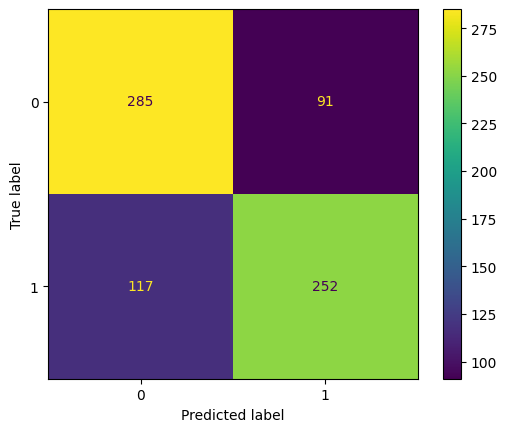

F1 Score:  0.7078651685393259


In [18]:
# Your solution here ###########################################################
cm, f1 = classifier(features_node, targets_node, labels, verbose=True)

Then train the classifier with feature selection with top 3 features and show the output including the feature scores.

Feature selection scores:

In Degree : 3.1324810143546507
Eigenvector Centrality : 24.53301879666362
Betweenness Centrality : 0.8698287365774127
Closeness Centrality : 35.63047021970143
Clustering Coefficients : 2.4452031673768864


3 features selected: ['In Degree' 'Eigenvector Centrality' 'Closeness Centrality'] 



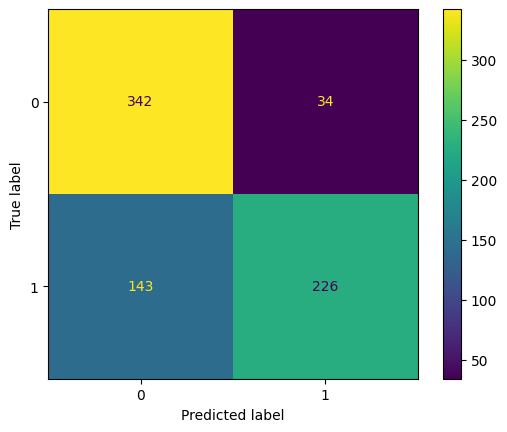

F1 Score:  0.7186009538950716


In [19]:
# Your solution here ###########################################################
cm, f1 = classifier(features_node, targets_node, labels, feature_selection=True, num_features=3, verbose=True)

**Observation:** using top 3 features improved the F1 score slightly.

---

**3.4.2  Find the best number of features selected [1 pt]**
With respect to the weighted f1 score, which is the best number of K chosen for the classification performance on the test set? Show the results using different K into a plot and find the best number of K.

The best K with respect to weighted f1 score is: 2
The f1 score is: 0.7258064516129031


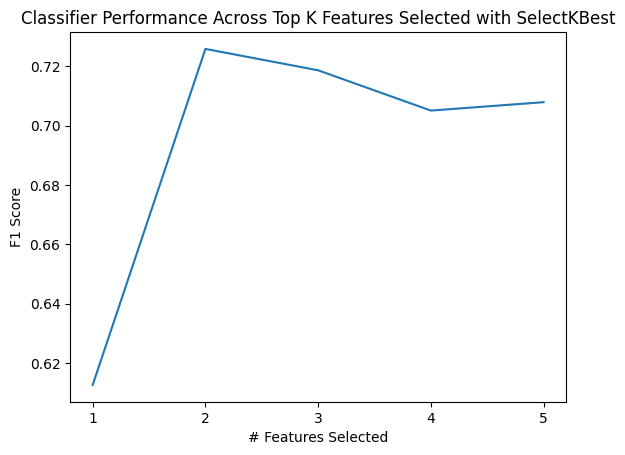

In [20]:
# Plot the weighted f1 score using different number of best K features in a figure, and print out the best number of K
'''
  k_best: the best number of K with respect to weighted f1 score on the test set
'''
# Your solution here ###########################################################
f1_scores = []
top_k = [1, 2, 3, 4, 5]
for k in top_k:
    _, f1 = classifier(features_node, targets_node, labels, feature_selection=True, num_features=k);
    f1_scores.append(f1)
    
plt.plot(top_k, f1_scores)
plt.title("Classifier Performance Across Top K Features Selected with SelectKBest")
plt.xticks(top_k)
plt.xlabel("# Features Selected")
plt.ylabel("F1 Score")
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

max_f1 = max(f1_scores)
k_best = top_k[f1_scores.index(max_f1)]
print("The best K with respect to weighted f1 score is: {}".format(k_best))
print("The f1 score is: {}".format(max_f1))

---

**3.4.3  Explanations for the Best Features [1 pt]**
**Q:** What are the best top K features selected in your implementation? Could you please give an possible explanation for why they play important roles in our node classification task?

**Your answer here:**
As seen with the output below, our top-2-feature classifier uses eigenvector centrality and closeness centrality to classify blogs.

Reasons why these two features can be effective in this classification tasks were described in 3.1 above. To repeat, it may be that one class is organized in a more hierarchical community than the other, or that one class of political leaning consists of blogs that are receiving many links from the opposing ideology blogs, but not the other way around. This could inflate one class' eigenvector centrality relative to the other. Furthermore, we can imagine that if, say, conservatives have one 'super blog' that is linking many other conservative blogs and being linked by many other conservative blogs, average closeness centrality would be low. If the liberal sphere lacks any such 'super blog', its average closeness centrality will be higher. 

Now we face the question of why these two features appear better at classifying blogs than in-degree, betweenness centrality, and clustering coefficients (seperately and combined). It is reasonable to presume theses features offer little (new) information about a blog when eigenvector centrality and closeness centrality are taken into account. Both liberals and conservatives will have high-impact and low-impact blogs, meaning in-degree can be either high or low across the spectrum. Similarly, both liberals and conservatives will have tight-knit communities around their subideologies, meaning it's easy to see how clustering coefficient distributions might not differ all that much. 

Finally, if we already know eignvector centrality and closeness centrality, betweenness centrality doesn't offer much more information. If we consider the possibility of 'echo chambers' in political discussions, inter-ideology links are not a particularly diffuse practice among political blogs (this can be seen in the graph visualiation near the beginning of the section). Thus, those blogs that do engage in cross-ideology linkage will have high betweenness centrality. But the spread of centrality intra-ideology will also yield nodes with high betweenness centrality. It will then be more difficult for an SVM to use variations in betweenness centrality to differentiate between ideological classes.

Feature selection scores:

In Degree : 3.1324810143546507
Eigenvector Centrality : 24.53301879666362
Betweenness Centrality : 0.8698287365774127
Closeness Centrality : 35.63047021970143
Clustering Coefficients : 2.4452031673768864


2 features selected: ['Eigenvector Centrality' 'Closeness Centrality'] 



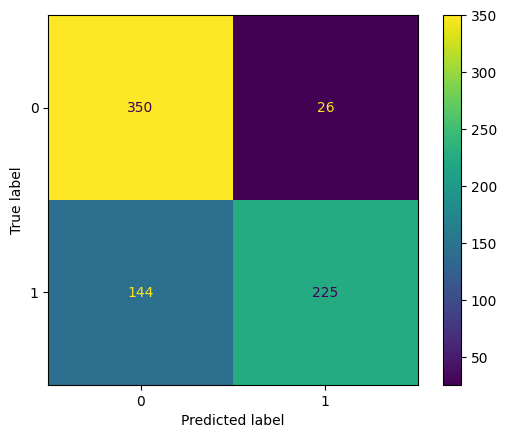

F1 Score:  0.7258064516129031


In [21]:
_, _ = classifier(features_node, targets_node, labels, feature_selection=True, num_features=2, verbose=True)

### **3.5: Node2vec features [11 pts]**

**3.5.1  Node2Vec Basics [1 pt]**

**Q:** Explain the main components of the Node2vec embedding and discuss in short the relevance of the parameters walk length, p, and q, used in the embedding.



**Your answer here:**

Node2Vec is an embedding system that makes use of 2nd-order 'guided' (or biased) random walks defined by parameters p and q. 

To explain this process, consider another popular embeding technique: **Word**2Vec. Word2Vec uses word context - other words that appear nearby - to create embeddings. **Node**2Vec operates on a similar intuition, except it must contend with the fact that 'context' for a node is not as clear as it is for a word. Node2Vec deals with this by parameterizing a random walk such that it samples nodes 'near' a source node, where 'near' can be thought of in both a breadth-first sense and a depth-first sense (indeed, the ability to exist inbetween these two extremes is part of what makes Node2Vec innovative). The size of these context samples is fixed and defined by the user. After sampling node contexts, Node2Vec initializes a function to map nodes into d-dimensional vectors (d is also input by the user) and then optimizes this function with stochastic gradient descent such that pairwise dot products in the embedding space are low between two nodes with similar contexts (AKA many of the same nodes appear in the context) and high otherwise. This optimization strategy for the embedding function is analgous to how word embeddings are created.

The more distinctive aspect of Node2Vec is how node contexts are created via guided random walks. The parameters p and q define the random walk. The parameter p, also called the return parameter, relates to how likely the random walk is to avoid visiting nodes previously visited in the walk. In practice, this means that a higher p allows a walk to wander further and further from the source node, while a lower p leads to a walk that remains near the source node. Meanwhile, q, or the 'in-out parameter', relates to how likely the random walk is to sample (or visit) nodes close to the most recently visited node in the walk. Thus, the higher q is, the more likely the walk is to visit nodes close to recently visited nodes, resembling breadth-first search. Depth-first search is emulated by a lower q, which tells the random walk to explore nodes less close to recently visited nodes. If p and q sound similar, it helps to remember that p is defining walk behavior relative to the *source* node in a walk while q is defining walk behavior relative to *the most recently visited* node in a walk.

---

**3.5.2 About node2vec parameters [3 pts]**

**Q:** As you know node2vec has two parameters p and q.
Which configuration of these parameters do you think best suits this task?
low/low, low/high, high/low, or high/high?

Please motivate your answer.


**Your answer here:**

The task at hand is to use node embeddings trained on inter-blog links to prepare an SVM classifier that classifies the political leanings of online blogs. 

It is reasonable to assume that the most appropriate node context for this task is one that prioritizes nodes close to the source and the tightly-knit clusters they constitute. This would correspond to low p (nodes close to the source) and low q (nodes close to those nodes). The reason for this particular combination is that authors of political blogs likely organize into homologous communities, in which members all conform to similar ideological perspectives - which in turn leads to blogs linking ideological similars more often than they link ideological opposites. Of course, some authors will occasionally link their ideological opposites (to write a rebuttal, perhaps), but a low p parameter will lower the likelihood that any random walk 'commits' to an ideology-crossing path of this type. A low q parameter, meanwhile, will prioritize analyzing clusters of authors, ensuring it is the community that blogs belong to rather than the rebuttal chain they find themselves in that defines their embedding.

---

**3.5.3  Node2Vec Node Feature Extraction [1 pt]**

Extract the node2vec features of nodes using the `node2vec.Node2Vec`.

*** Please set `random_state=0` and `seed=0` for reproducibility.**




In [22]:
def Node2Vec_node_feature_extraction(G, num_features=1, p=1.0, q=1.0, seed=0):
  '''
  INPUT:
  G: the graph
  num_features: dimension of node2vec embeddings, int
  p: float
  q: float
  seed: please always set to 0

  OUTPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: dimension of Node2Vec embeddings)
  '''

  #
  # Your solution here ###########################################################

  n2v = Node2Vec(G, dimensions=num_features, p=p, q=q, walk_length=80, num_walks=10, seed=seed)
  model = n2v.fit()
  features = np.array([model.wv.get_vector(node) for node in G.nodes])

  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return features

**3.5.4  Implement node classification using Node2Vec [2 pts]**

Let's implement your Node2Vec based classification by setting `num_features=3, p=1.0, q=0.1`

Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 15.81it/s]


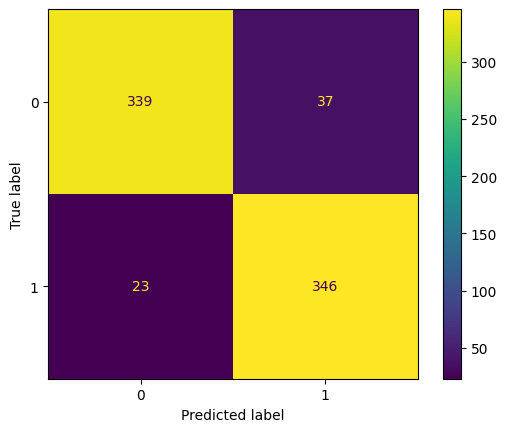

F1 Score:  0.9202127659574469


In [23]:
# Implement Node2Vec by setting:
# num_features=3, p=1.0, q=0.1


# Your solution here ###########################################################
embeddings_qlow = Node2Vec_node_feature_extraction(G, num_features=3, p=1, q=0.1)
cm, f1 = classifier(embeddings_qlow, targets_node, labels, verbose=True)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Let's change your parameters to `q=10.0` and implement your results.

Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


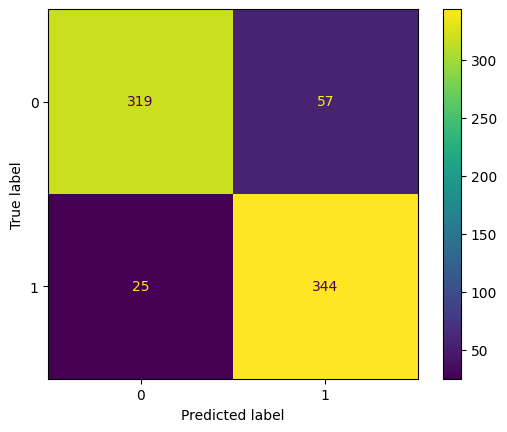

F1 Score:  0.8935064935064935


In [24]:
# Implement Node2Vec by changing:
# q=10.0
# Your solution here ###########################################################

embeddings_qhigh = Node2Vec_node_feature_extraction(G, num_features=3, p=1, q=10)
cm, f1 = classifier(embeddings_qhigh, targets_node, labels, verbose=True)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

---

**3.5.5  Parameters in Node2Vec [2 pts]**

**Q:** What difference do you observe in both classifiers? Why do you think this difference exists by changing this parameter?



**Your answer here:**

When q is changed from 0.1 to 10, we can see:

- The F1 Score decreases
- The number of correctly classified nodes decrease for both labels (liberal and conservative)
- The drop in classification accuracy is higher for one political ideology than the other (is it possible to see which ideology is 0 and which is 1?)

As stated in 3.5.2, it is reasonable to assume that a higher q is less suited for a task. The higher we set q, the more the random walk is engaging in DFS-style sampling. It is thus traversing a chain of links that can be reasonably expected to bring it further and further from the ideological perspective of the source node but encouraging it to successively distance itself from previous steps in the walk. The result will be node contexts that include more nodes of differing political ideology, thus complicating efforts to create embeddings that can delineate between nodes on ideological lines. 

The variation in the classification accuracy between political parties is interesting, though it may simply be due to the particular random walks used in constructing the node contexts for embeddings.

---

**Q:** What might be other parameters that we can change in Node2Vec to improve our classification performance? Try to change this parameter and implement in the cell below to achieve a better performance than above.

**Your answer here:**
The p parameter, the dimension of the embeddings, the number of steps in each random walk, and the number of random walks included for embedding optimization could all be changed in pursuit of better classification performance. 

We will single out the dimension of the embeddings as our parameter to change. Because we are using an SVM classifier, it's possible that embeddings of higher dimensions will allow the model to have an easier time linearly separating the input samples - provided the curse of dimensionality does not complicate similarity measurements between nodes in the embedding space.

Below, we increase the number of features (the embedding dimension) from 3 to 7, and find a marginal increase in classification accuracy for both conservative nodes and liberal nodes (in total, 7 more nodes are classified correctly relative to the first and better-performing classifier from 3.5.4).


Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 16.34it/s]


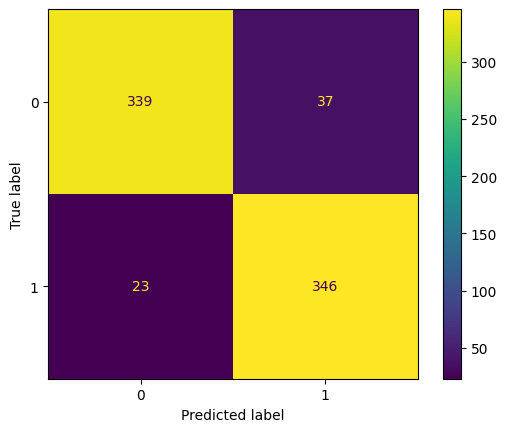

F1 Score:  0.9202127659574469


Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 16.30it/s]


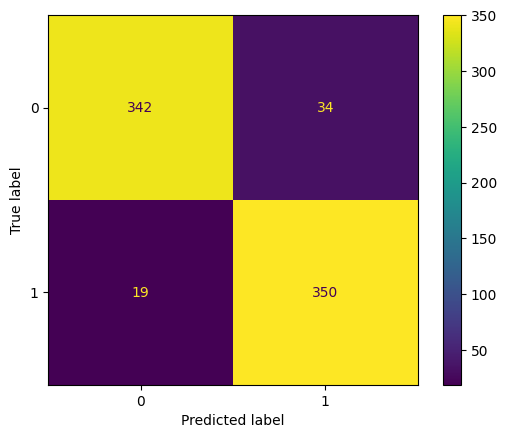

F1 Score:  0.9296148738379814


In [25]:
# Implement Node2Vec by changing your chosen parameter and try to achieve a better performance
# Your solution here ###########################################################
embeddings_dim3 = Node2Vec_node_feature_extraction(G, num_features=3, p=1, q=0.1)
cm, f1 = classifier(embeddings_dim3, targets_node, labels, verbose=True)

embeddings_dim7 = Node2Vec_node_feature_extraction(G, num_features=7, p=1, q=0.1)
cm, f1 = classifier(embeddings_dim7, targets_node, labels, verbose=True)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

But was the performance increase observed merely a chance (considering we chose arbitrary numbers for num_features). Let's investigate further how different parameter values impacts model performance for p=1, q=0.1

In [ ]:
num_features = [i for i in range(1,51)]

node2vec_f1_scores = []
node2vec_accuracies = []
for nf in num_features:
    tmp_embedding = Node2Vec_node_feature_extraction(G, num_features=nf, p=1, q=0.1)
    cm, f1 = classifier(tmp_embedding, targets_node, labels, verbose=False)
    accuracy = np.trace(cm)/np.sum(cm)
    node2vec_f1_scores.append(f1)
    node2vec_accuracies.append(accuracy)

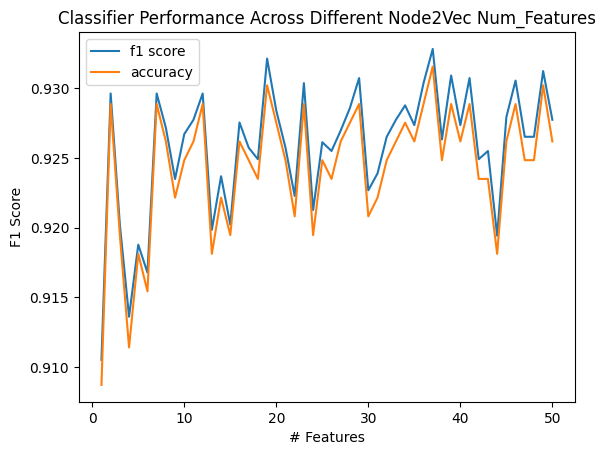

The best K with respect to weighted f1 score is: 37
The f1 score is: 0.9328063241106719

The best K with respect to classification accuracy is: 37
The accuracy score is: 0.9315436241610738


In [95]:
plt.plot(num_features, node2vec_f1_scores, label='f1 score')
plt.plot(num_features, node2vec_accuracies, label='accuracy')
plt.title("Classifier Performance Across Different Node2Vec Num_Features")
plt.xlabel("# Features")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

max_f1 = max(node2vec_f1_scores)
best_num_features = num_features[node2vec_f1_scores.index(max_f1)]
print("The best K with respect to weighted f1 score is: {}".format(best_num_features))
print("The f1 score is: {}".format(max_f1))
print()

max_accuracy = max(node2vec_accuracies)
best_num_features = num_features[node2vec_accuracies.index(max_accuracy)]
print("The best K with respect to classification accuracy is: {}".format(best_num_features))
print("The accuracy score is: {}".format(max_accuracy))

In [96]:
map_n2v_performance = {i+1: x for i,x in enumerate(zip(node2vec_f1_scores, node2vec_accuracies))}

print('Top 10 num_features wrt F1 Score + Resulting Accuracy:')
sorted(map_n2v_performance.items(), key=lambda x:x[1], reverse=True)[0:10]

Top 10 num_features wrt F1 Score + Resulting Accuracy:


[(37, (0.9328063241106719, 0.9315436241610738)),
 (19, (0.9321148825065274, 0.9302013422818792)),
 (49, (0.9312169312169313, 0.9302013422818792)),
 (39, (0.9308996088657105, 0.9288590604026845)),
 (29, (0.930718954248366, 0.9288590604026845)),
 (41, (0.930718954248366, 0.9288590604026845)),
 (46, (0.9305373525557012, 0.9288590604026845)),
 (23, (0.9303547963206307, 0.9288590604026845)),
 (36, (0.9303547963206307, 0.9288590604026845)),
 (2, (0.9296148738379814, 0.9288590604026845))]

**Observations:** we observe that the number of features actually impacts model performance quite singificantly. Surprisingly, num_features = 2 yields very good performance, while increasing num_features can both improve and hurt model performance wrt F1 Score and Accuracy. We also observe that our initial choice of num_features = 3 was a suboptimal choice. 

NOTE: this plot only represent the performance of different number of features for p=1 and q=0.1. Changing these parameters will also change the optimal value for num_features

Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 16.16it/s]


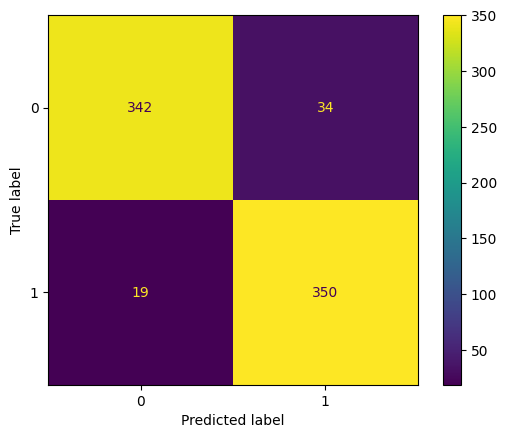

F1 Score:  0.9296148738379814


Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 16.31it/s]


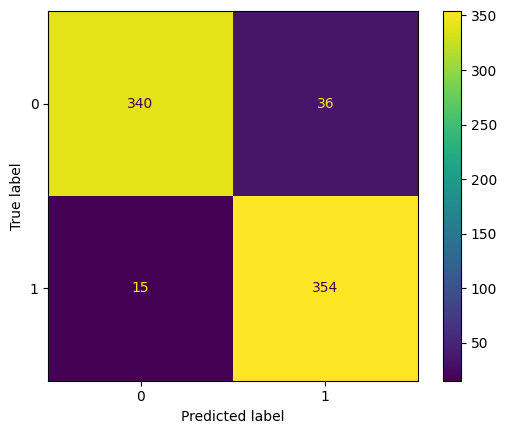

F1 Score:  0.9328063241106719


In [26]:
embeddings_dim2 = Node2Vec_node_feature_extraction(G, num_features=2, p=1, q=0.1)
cm, f1 = classifier(embeddings_dim2, targets_node, labels, verbose=True)

embeddings_dim37 = Node2Vec_node_feature_extraction(G, num_features=37, p=1, q=0.1)
cm, f1 = classifier(embeddings_dim37, targets_node, labels, verbose=True)

**Observation:** Comparing the confusion matrices of num_features = {2,37}, we observe similar, yet different model behaviour. Both models makes the same number of predictions per class. Num_features = 2 appears to make more correct predictions on class 0, while slightly more often falsely predicting class 1. In contrast, num_features = 37 makes more correct predictions on class 1 which appears to be the majority class, thus resulting in a slightly higher F1 Score. 

In conclusion, num_features = 2 does appear to be very similar in behaviour to num_features = 37.

---

Out of curiosity, we also conducted a similar experiment on walk_lenghts. To do so, we had to modify our initial embedding-function:

In [98]:
def Node2Vec_node_features(G, num_features=1, p=1.0, q=1.0, walk_length=80, seed=0):
  '''
  INPUT:
  G: the graph
  num_features: dimension of node2vec embeddings, int
  p: float
  q: float
  seed: please always set to 0

  OUTPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: dimension of Node2Vec embeddings)
  '''

  #
  # Your solution here ###########################################################

  n2v = Node2Vec(G, dimensions=num_features, p=p, q=q, walk_length=walk_length, num_walks=10, seed=seed)
  model = n2v.fit()
  features = np.array([model.wv.get_vector(node) for node in G.nodes])

  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return features

Previously, the default walk_length of 80 was used. Lets evaluate how shorter and longer walk lengths affect model performance!

In [ ]:
walk_lengths = [i for i in range(1,100)]

node2vec_f1_scores = []
node2vec_accuracies = []
for wl in walk_lengths:
    tmp_embedding = Node2Vec_node_features(G, num_features=2, p=1, q=0.1,walk_length=wl)
    cm, f1 = classifier(tmp_embedding, targets_node, labels, verbose=False)
    accuracy = np.trace(cm)/np.sum(cm)
    node2vec_f1_scores.append(f1)
    node2vec_accuracies.append(accuracy)

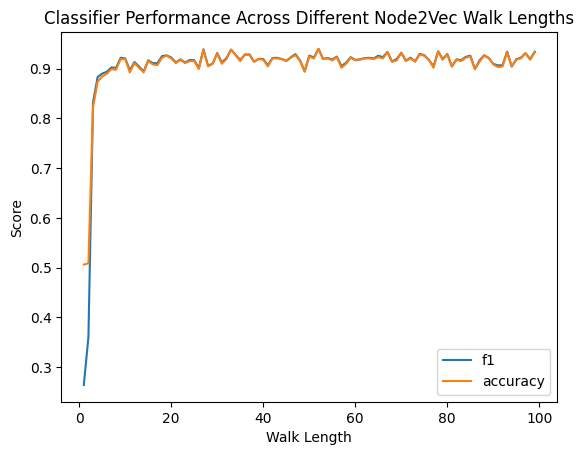

The best walk_length with respect to weighted f1 score is: 52
The f1 score is: 0.9399198931909212

The best walk_length with respect to classification accuracy is: 52
The accuracy score is: 0.9395973154362416


In [100]:
plt.plot(walk_lengths, node2vec_f1_scores, label='f1')
plt.plot(walk_lengths, node2vec_accuracies, label='accuracy')
plt.title("Classifier Performance Across Different Node2Vec Walk Lengths")
plt.xlabel("Walk Length")
plt.ylabel("Score")
plt.legend()
plt.show()

max_f1 = max(node2vec_f1_scores)
best_num_features = walk_lengths[node2vec_f1_scores.index(max_f1)]
print("The best walk_length with respect to weighted f1 score is: {}".format(best_num_features))
print("The f1 score is: {}".format(max_f1))
print()

max_accuracy = max(node2vec_accuracies)
best_num_features = walk_lengths[node2vec_accuracies.index(max_accuracy)]
print("The best walk_length with respect to classification accuracy is: {}".format(best_num_features))
print("The accuracy score is: {}".format(max_accuracy))

In [101]:
map_n2v_performance = {i+1: x for i,x in enumerate(zip(node2vec_f1_scores, node2vec_accuracies))}

print('Top 10 walk_lenghts wrt F1 Score & Resulting Accuracy:')
sorted(map_n2v_performance.items(), key=lambda x: x[1], reverse=True)[0:10]

Top 10 walk_lenghts wrt F1 Score & Resulting Accuracy:


[(52, (0.9399198931909212, 0.9395973154362416)),
 (27, (0.9393139841688655, 0.938255033557047)),
 (33, (0.9385026737967914, 0.938255033557047)),
 (78, (0.9352708058124175, 0.934228187919463)),
 (93, (0.9343832020997376, 0.9328859060402684)),
 (99, (0.9342105263157894, 0.9328859060402684)),
 (67, (0.9338624338624338, 0.9328859060402684)),
 (70, (0.9322709163346613, 0.9315436241610738)),
 (30, (0.9315789473684211, 0.9302013422818792)),
 (97, (0.9313593539703903, 0.9315436241610738))]

**Comments:** The plot demonstrates deminishing returns for increased walk length > 5. An appropriate walk_length is problem dependent, but possible interpretations of the results could be limited reachability/mobility within the graph or highly correlated political leaning (blogs share leaning with their close neighbours). Assuming we drew enough samples and chose appropriate values for p and q, shorter walks should in theory encapsulate close neighbourhood information, and the limited performance gain seen by an increased walk-length possibly suggest that the local neighbourhood information is significant for node classification, while global graph topology is less important. 

---

**3.5.6  Comparing Hand-crafted and Node2Vec Features [2 pts]**

Now we can combine the hand-crafted features and node2vec embeddings together. Use the 5 hand-crafted features and 5-dimensional node embeddings. Construct them into 10-dimensional features and implement them into the classifier with top-3 scored features and show the feature scores in the following cell.

*** Please set `seed=0`, `p=1.0` and `q=10.0` for reproducibility.**

Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 11.32it/s]


Feature selection scores:

In Degree : 3.1324810143546507
Eigenvector Centrality : 24.53301879666362
Betweenness Centrality : 0.8698287365774127
Closeness Centrality : 35.63047021970143
Clustering Coefficients : 2.4452031673768864
Node2Vec_Dim1 : 11.532715373675831
Node2Vec_Dim2 : 65.06405625086121
Node2Vec_Dim3 : 571.5526418639747
Node2Vec_Dim4 : 209.04553392487122
Node2Vec_Dim5 : 6.9829545755115126


3 features selected: ['Node2Vec_Dim2' 'Node2Vec_Dim3' 'Node2Vec_Dim4'] 



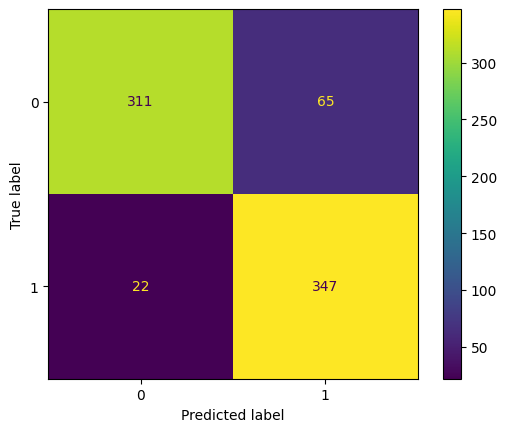

F1 Score:  0.8886043533930857


In [27]:
# Implement Node2Vec and combine them with hand-crafted features then use them for classification
# Your solution here ###########################################################
embeddings = Node2Vec_node_feature_extraction(G, num_features=5, p=1, q=10)
cm, f1 = classifier(np.concatenate((features_node, embeddings), axis=1), targets_node, labels, num_features=3, feature_selection=True, verbose=True, feature_set = ['In Degree', 'Eigenvector Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Clustering Coefficients', 'Node2Vec_Dim1', 'Node2Vec_Dim2', 'Node2Vec_Dim3', 'Node2Vec_Dim4', 'Node2Vec_Dim5'])
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Q: According the results you showed above, which group of features between hand-crafted and Node2Vec are scored better in general? Could you give an explanation for why this group of features are scored higher than the others and are better predictors in the classifier?

**Your answer here:**
The feature selection process scores Node2Vec features better in general than hand-crafted features. One possible explanation is that Node2Vec, while unsupervised, is essentially learning how to represent nodes such that nodes of similar ideological perspective have similar embeddings. In the same way Word2Vec will capture semantic relationships by connecting words often seen together to one another, Node2Vec will capture ideological relationships in this framework by connecting nodes often seen together in guided random walks along inter-blog links. It is relying on the fact that blogs of certain perspectives will often link intra-perspective to recover as much as possible a non-human readable but highly suitable feature representation.

Our hand-crafted features, meanwhile, have greater difficulty in targeting latent ideological perspective in our nodes. In degree, centrality, and clustering coefficients may generally differ between liberals and conservatives, but not in a way that is as informative as which types of blogs - liberal or conservative - are interacting with a given blog to be classified. As our hand-crafted features rely less on the manifestation of ideological slant, they will be less successful in assisting the classifier.  

---

Experiment to see if ideal p and q line up with intuition:

In [29]:
embeddings = Node2Vec_node_feature_extraction(G, num_features=2, p=1, q=1)
cm, f1 = classifier(embeddings, targets_node, labels)
print(f"p = 1, q = 1 -> f1: {f1}\n")

embeddings = Node2Vec_node_feature_extraction(G, num_features=2, p=0.1, q=0.1)
cm, f1 = classifier(embeddings, targets_node, labels)
print(f"p = 0.1, q = 0.1 -> f1: {f1}\n")


embeddings = Node2Vec_node_feature_extraction(G, num_features=2, p=0.1, q=10)
cm, f1 = classifier(embeddings, targets_node, labels)
print(f"p = 0.1, q = 10 -> f1: {f1}\n")


embeddings = Node2Vec_node_feature_extraction(G, num_features=2, p=10, q=0.1)
cm, f1 = classifier(embeddings, targets_node, labels)
print(f"p = 10, q = 0.1 -> f1: {f1}\n")


embeddings = Node2Vec_node_feature_extraction(G, num_features=2, p=10, q=10)
cm, f1 = classifier(embeddings, targets_node, labels)
print(f"p = 10, q = 10 -> f1: {f1}\n")

Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 14.20it/s]


p = 1, q = 1 -> f1: 0.9315789473684211



Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


p = 0.1, q = 0.1 -> f1: 0.9301712779973649



Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  8.22it/s]


p = 0.1, q = 10 -> f1: 0.9069767441860465



Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 16.18it/s]


p = 10, q = 0.1 -> f1: 0.9198423127463865



Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 11.68it/s]


p = 10, q = 10 -> f1: 0.8923476005188068



We observe that p = 1, q =1 yields the highest performance. We initially hypothesized that low/low p and q would perform the best, and that is generally in line with the results observed above. The two configurations p=q=1 and p=q=0.1 can both be considered low/low, and they yield very comparable results. The worst configuration is p=q=10 (high/high).